<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
sns.set_style('whitegrid')

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
## Load data
sat_score_f = 'sat_scores.csv'
sat_df = pd.read_csv(sat_score_f)

In [3]:
## quick look at data
sat_df.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [4]:
sat_df.shape

(52, 4)

In [5]:
sat_dict = {}
sat_dict['Math'] = []
sat_dict['State'] = []
sat_dict['Rate'] = []
sat_dict['Verbal'] = []

with open('sat_scores.csv') as f:
    # Use first row as keys and subsequent rows as values for this list
    reader = csv.DictReader(f)
    for row in reader:
        sat_dict['Math'].append(row['Math'])
        sat_dict['State'].append(row['State'])
        sat_dict['Rate'].append(row['Rate'])
        sat_dict['Verbal'].append(row['Verbal'])

print sat_dict

{'Verbal': ['509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577', '564', '584', '562', '575', '593', '577', '592', '566', '506'], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4'

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [6]:
# dataframe create from sat_dict
sat_df1 = pd.DataFrame(sat_dict)
print sat_df1.dtypes

print ''

# dataframe create from pd.read_csv()
sat_score_f = 'sat_scores.csv'
sat_df2 = pd.read_csv(sat_score_f)
print sat_df2.dtypes

Math      object
Rate      object
State     object
Verbal    object
dtype: object

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


---
For `sat_df1`, the `csv.DicReader` read the csv file as strings when we store into `sat_dict`. When we convert `sat_dict` to DataFrames with `pandas`, the data remained as the same format from `sat_dict`.

For `sat_df2`, `pd.read_csv()` reads the data and convert the data into appropriate data types.

---

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [7]:
sat_df2.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

### Data dictionary for sat_df2 ###
---
**State** represent US states. For example CT = Connecticut and NJ = New Jersey.

**Rate** represent SAT participation rate in percentage for the states.

**Verbal** represent the mean Verbal SAT score for the states. (between 200 - 800)

**Math** represent the mean Math SAT score for the states (between 200 - 800)

---

In [8]:
data_dict = {}
data_dict['columns'] = sat_df2.columns
data_dict['dtypes'] = sat_df2.dtypes
data_dict['description'] = {'State': "US states. For example CT = Connecticut and NJ = New Jersey.",
                            'Rate' : "SAT participation rate in percentage for the states.",
                            'Verbal' : "mean Verbal SAT score for the states. (between 200 - 800)",
                            'Math'   : "mean Math SAT score for the states (between 200 - 800)" }
data_dict['shape'] = {'row':sat_df2.shape[0], 'columns':sat_df2.shape[1]}

print data_dict

{'dtypes': State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object, 'shape': {'columns': 4, 'row': 52}, 'description': {'Math': 'mean Math SAT score for the states (between 200 - 800)', 'State': 'US states. For example CT = Connecticut and NJ = New Jersey.', 'Rate': 'SAT participation rate in percentage for the states.', 'Verbal': 'mean Verbal SAT score for the states. (between 200 - 800)'}, 'columns': Index([u'State', u'Rate', u'Verbal', u'Math'], dtype='object')}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

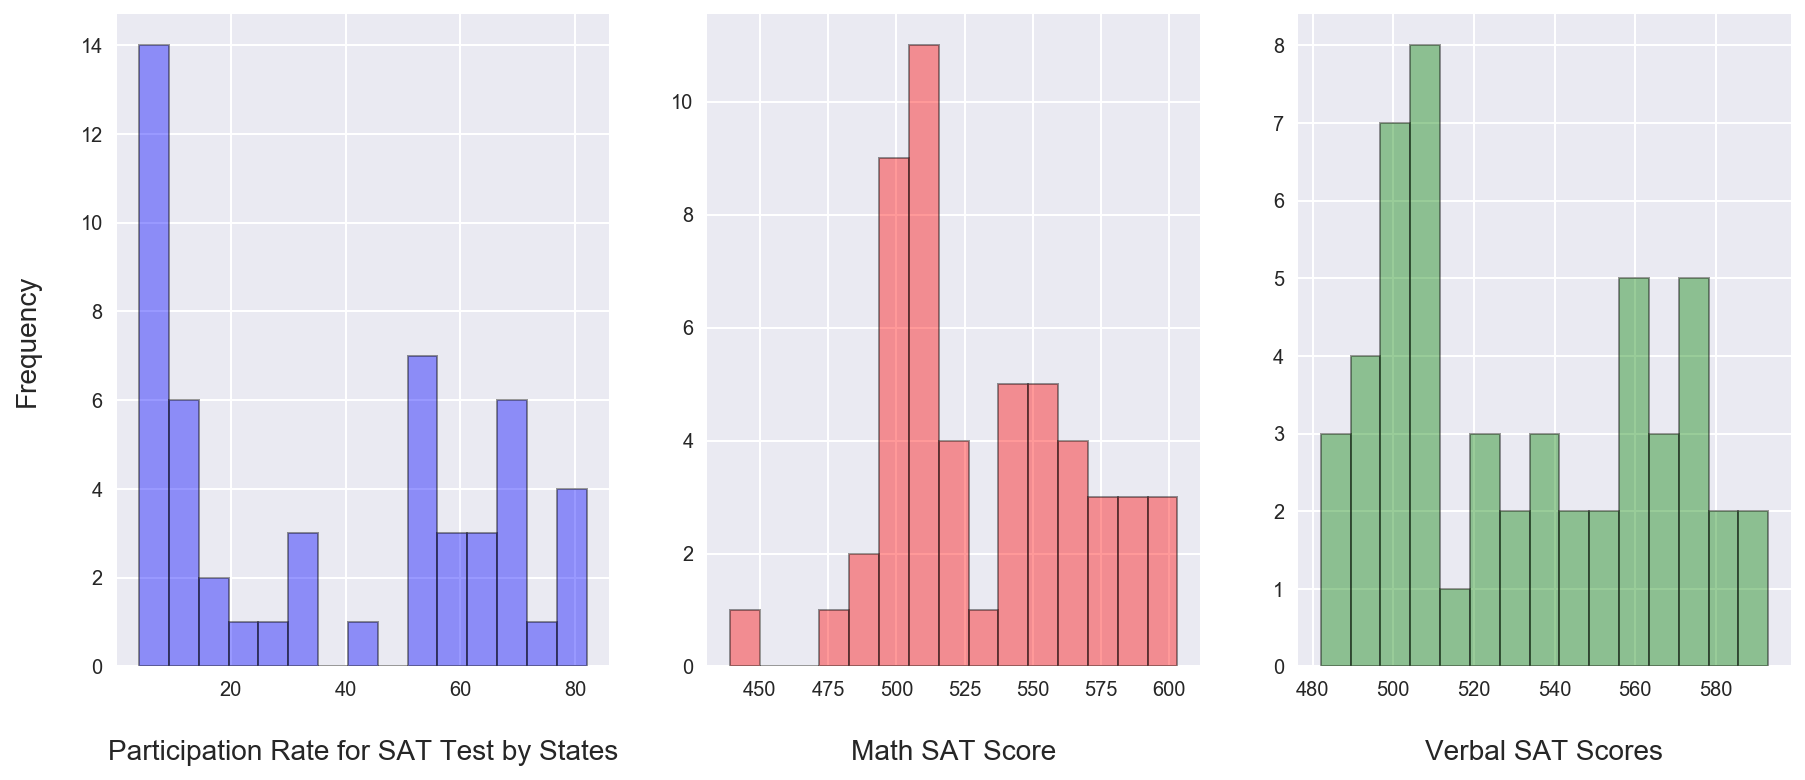

In [9]:

#sns.set(rc={"figure.figsize": (8, 8)})
sns.set(rc={"figure.figsize": (15, 6)})


plt.subplot(1,3,1)
ax1 = sns.distplot(sat_df2['Rate'],bins=15, kde=False, hist_kws=dict(edgecolor="k", linewidth=1, color="b"))
ax1.set_xlabel("Participation Rate for SAT Test by States", labelpad=20.0, size = 14)
ax1.set_ylabel("Frequency", labelpad=20.0, size = 14)

plt.subplot(1,3,2)
ax2 = sns.distplot(sat_df2['Math'],bins=15, kde=False, hist_kws=dict(edgecolor="k", linewidth=1, color="r"))
ax2.set_xlabel("Math SAT Score", labelpad=20.0, size = 14)

plt.subplot(1,3,3)
ax3 = sns.distplot(sat_df2['Verbal'],bins=15, kde=False, hist_kws=dict(edgecolor="k", linewidth=1, color="g"))
ax3.set_xlabel("Verbal SAT Scores", labelpad=20.0, size = 14)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

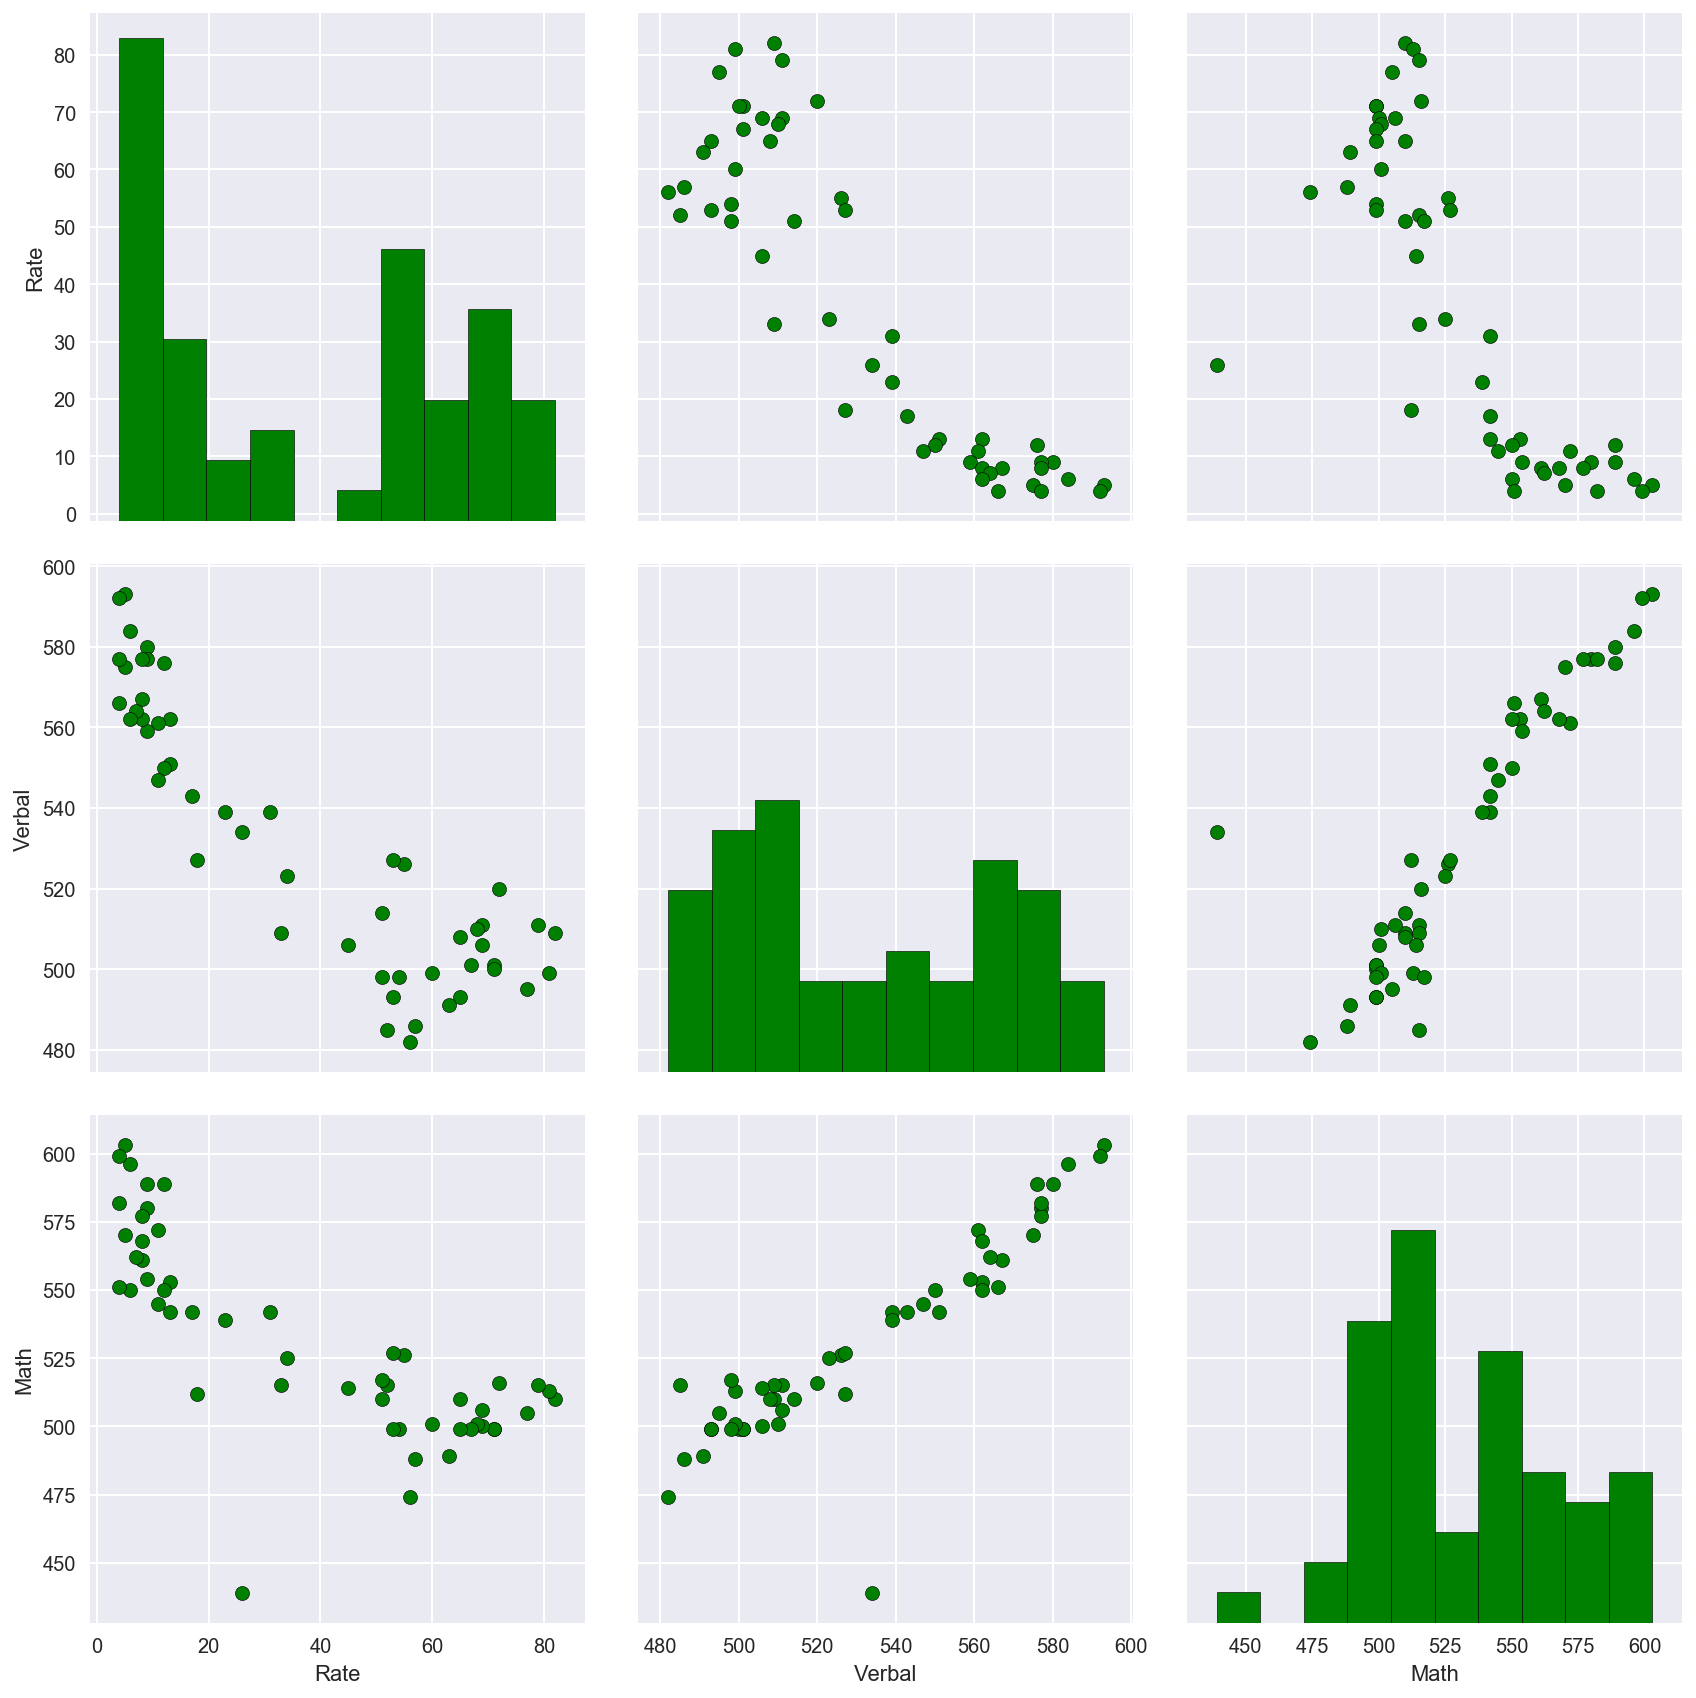

In [10]:
g = sns.pairplot(sat_df2 , size=4.0, diag_kind="hist", diag_kws=dict(color = 'g', edgecolor="k"), plot_kws=dict(color = 'g', edgecolor='k'))

## There seem to be some linear correlation between Verbal and Math SAT score.

## There seem to be some linear correlation between Rate of participation and  Verbal/Math Score

## No signification distribution for Rate, Math and Verbal.

# Change plot size.

1) From Rate histogram, there seem to be 2 cluster, one above 40% and one below 40% 

2) There seem to be some positive correlation between Verbal and Math. This might indicate that those with higher Verbal score has also hight Math score.

3) There seem to be 2 cluster for the scatterplot for Rate and Math as well as Rate and Verbal. There is an indication that lower participation rate will result in higher Math and Verbal Score. It might mean that states with lower participation rate state send their best students to take the SAT test.

4) There seem to be 1 outlier for the Verbal and Math scatterplot

5) There seem to be 1 outlier for the Rate and Math scatterplot

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

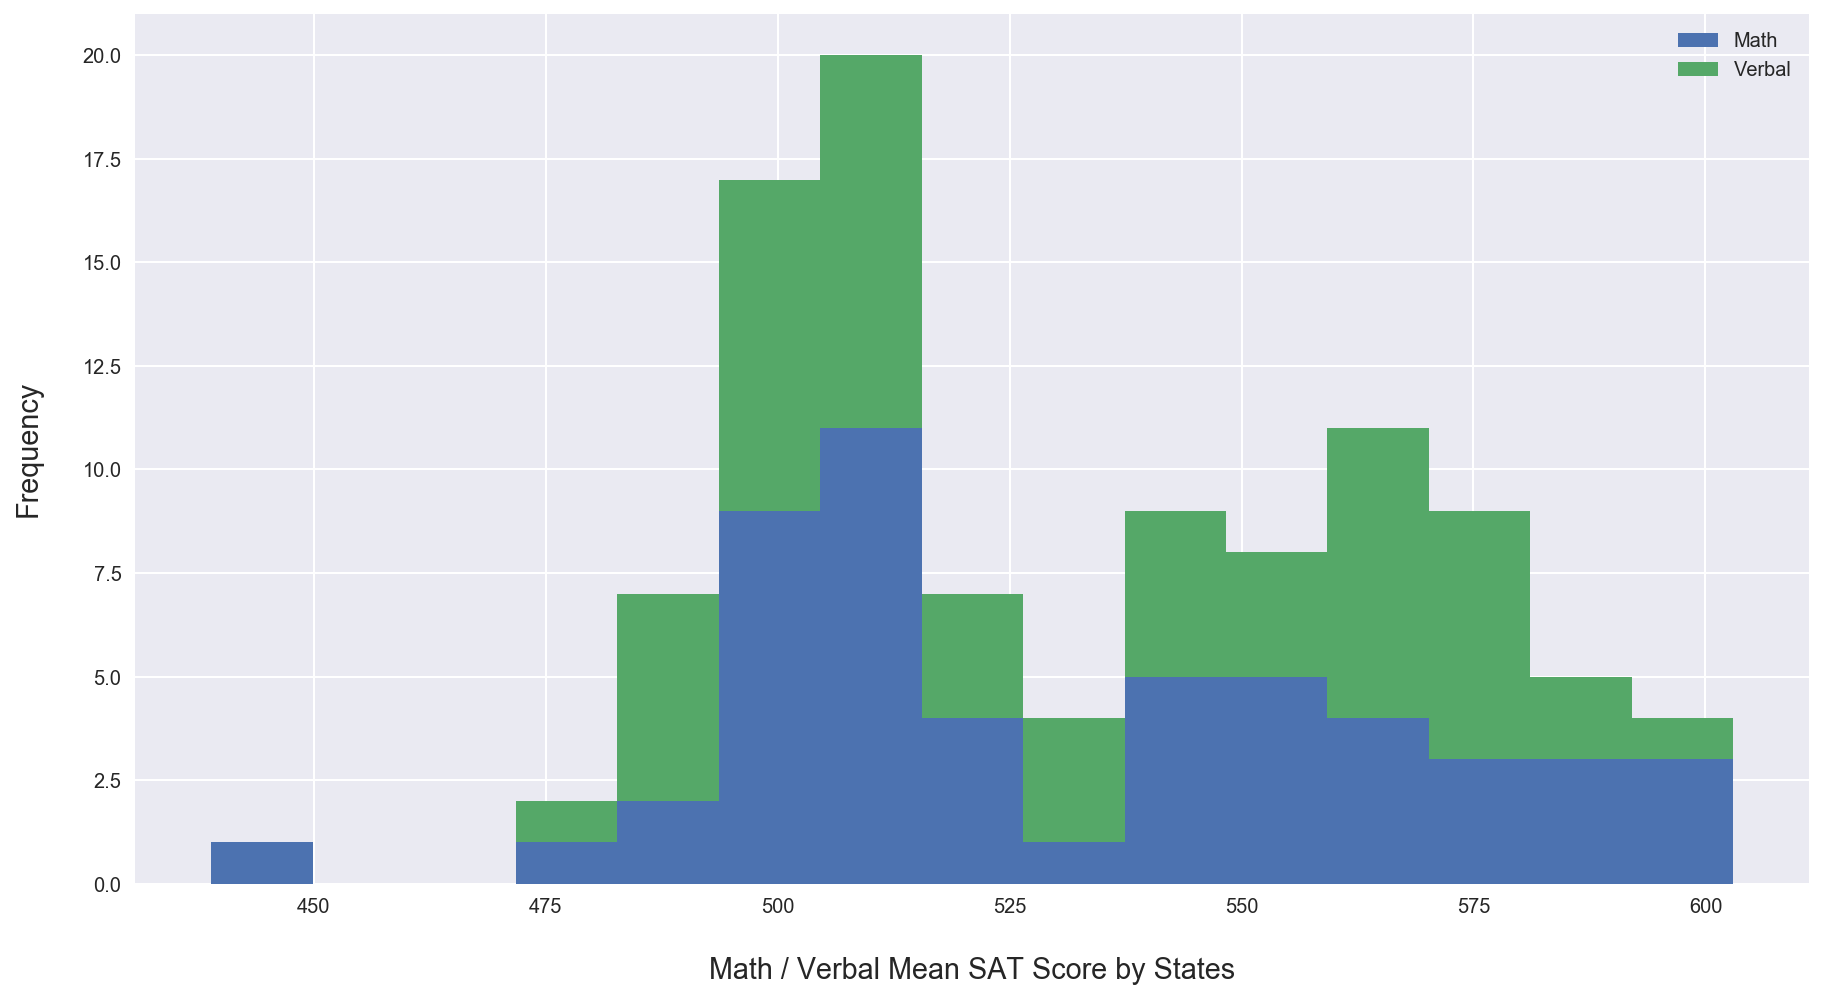

In [11]:
sns.set(rc={"figure.figsize": (15, 8)})
ax = sat_df2.loc[:,['Math','Verbal']].plot.hist(stacked=True, bins=15)
ax.set_xlabel("Math / Verbal Mean SAT Score by States", labelpad=20.0, size = 'large')
ax.set_ylabel("Frequency", labelpad=20.0, size = 'large')

# Change legend size

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

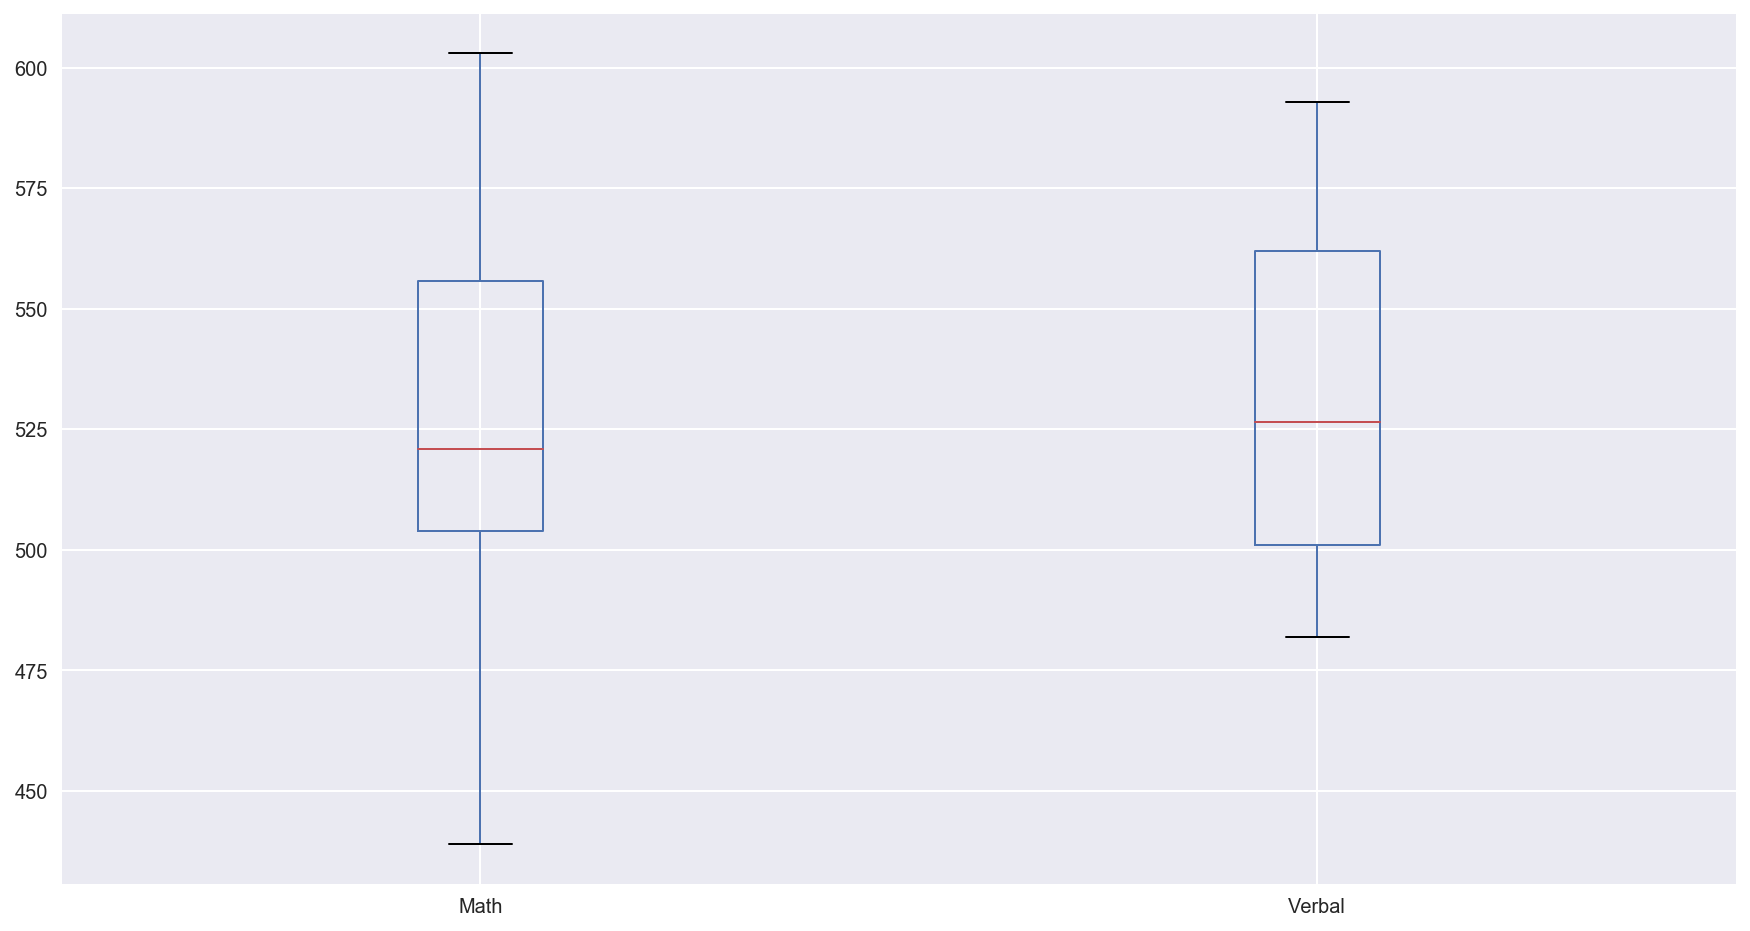

In [12]:
box = sat_df2.loc[:,['Math','Verbal']].plot.box()
# can see where the range of values lies. check for outlier

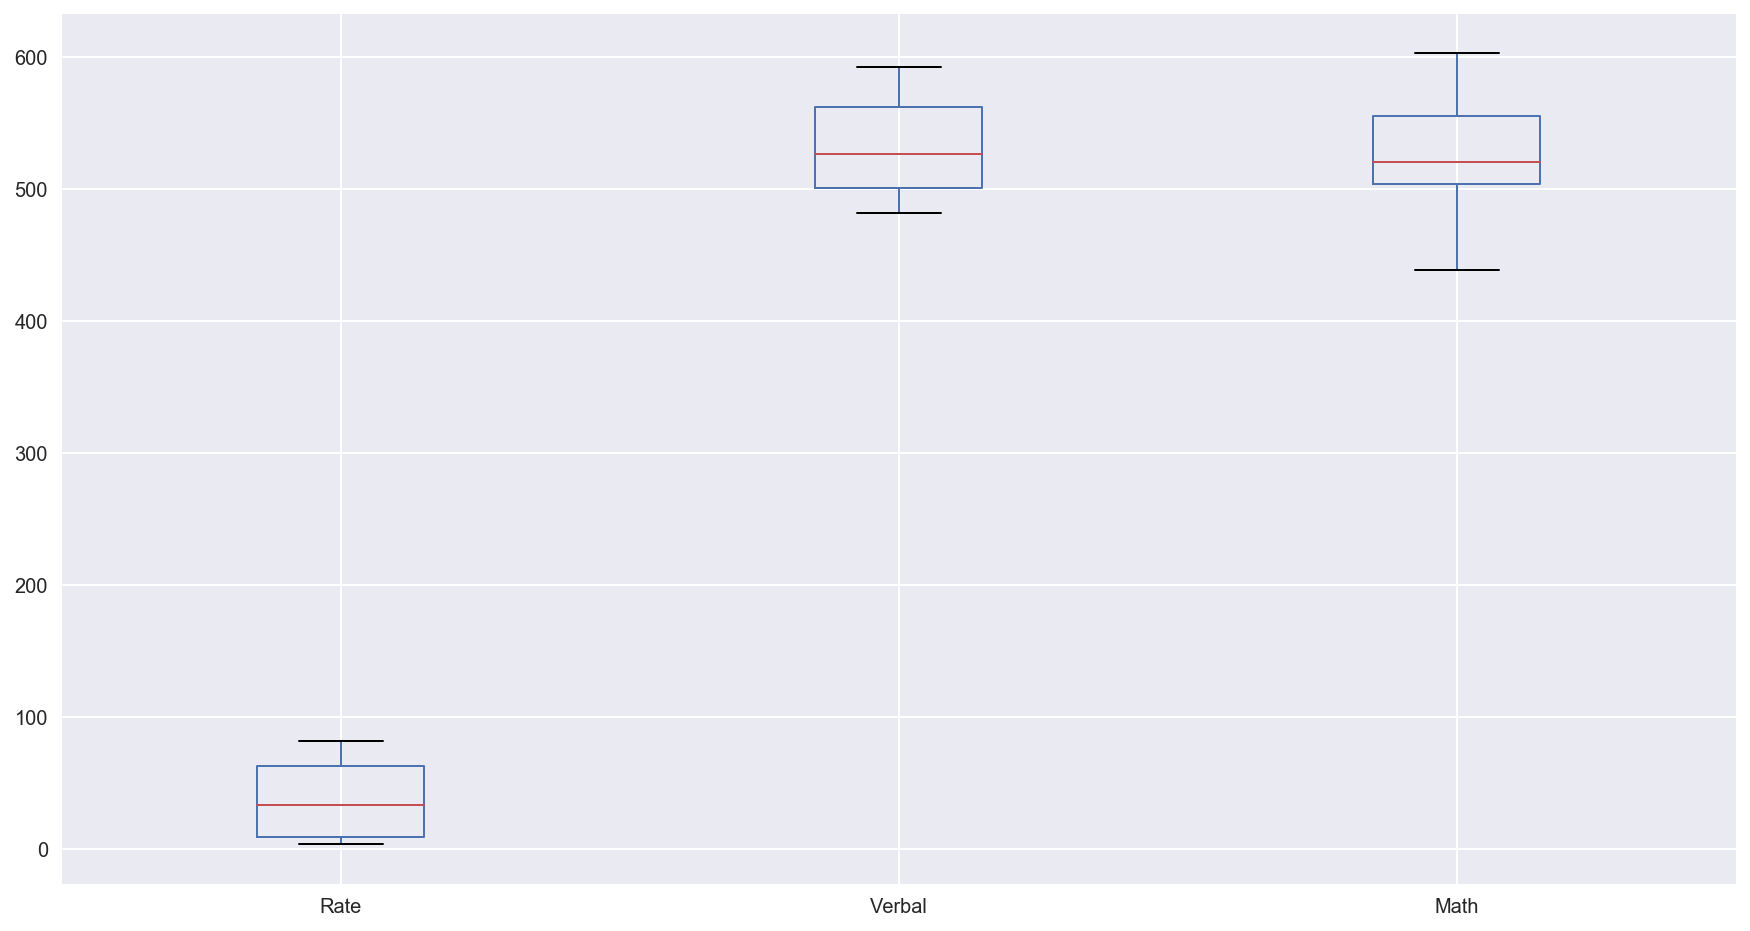

In [13]:
box = sat_df2.plot.box()
# Rate range of values are much lower then Verbal and Math

Rate contains data in percentage which takes a value from the range between 0 to 100 while Verbal and Math takes a value from the range of 200 to 800. The range of values are a mismatch and the dataset could not be compared visually.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


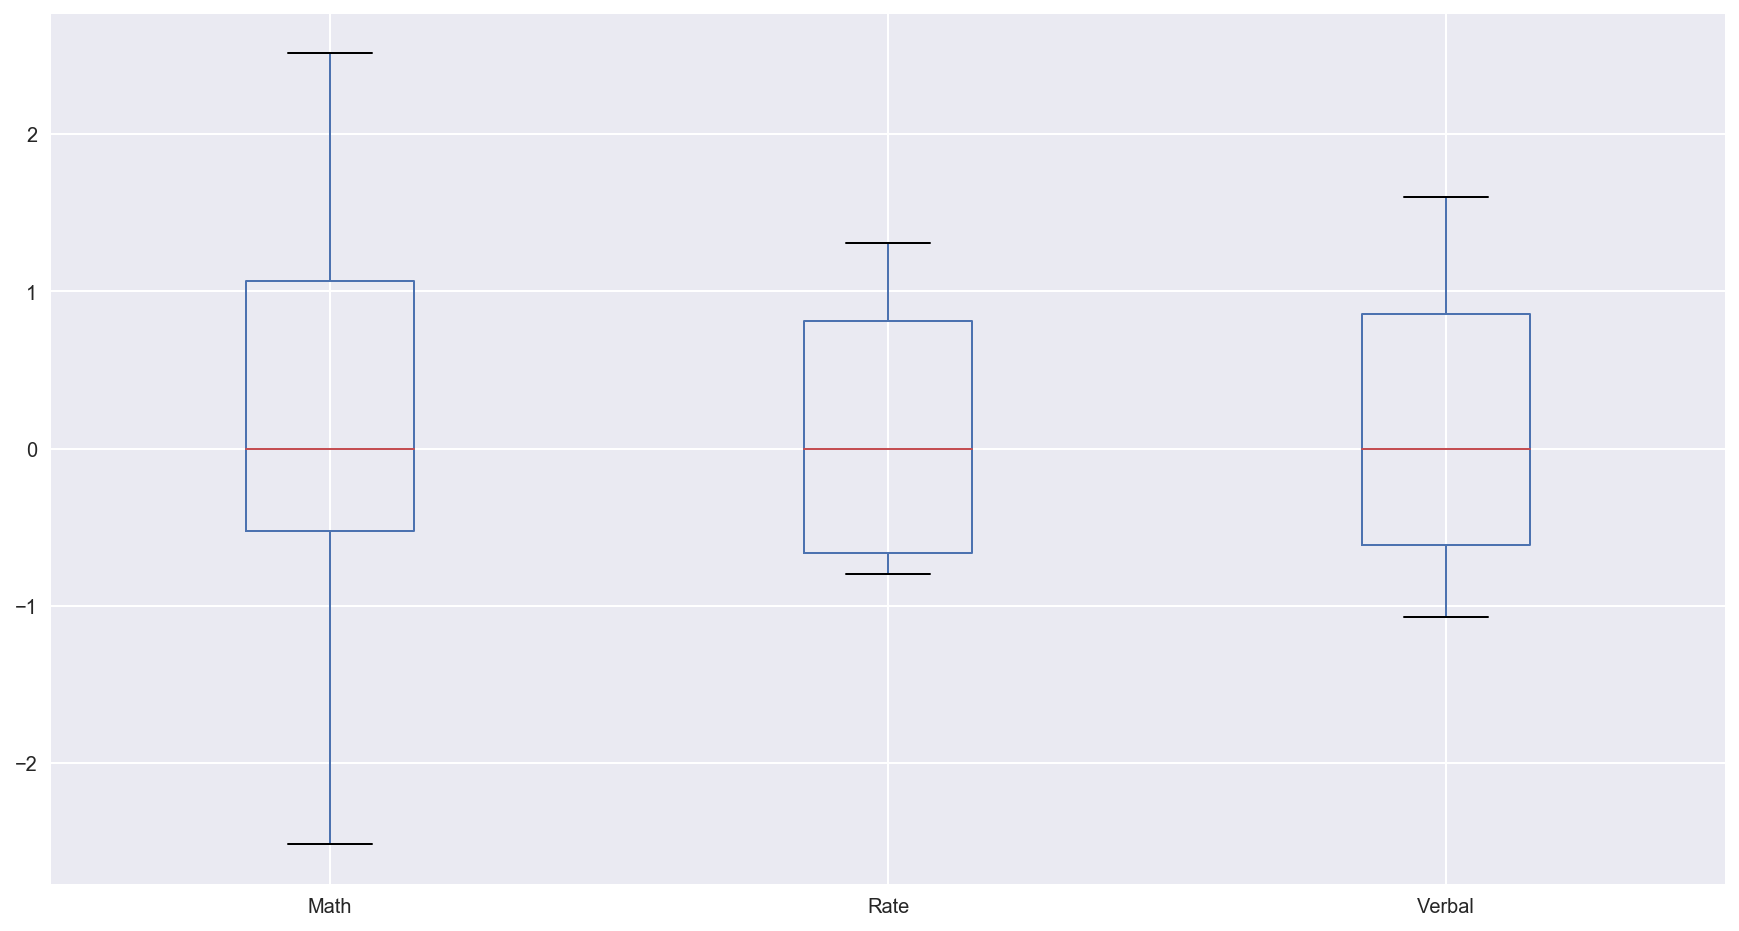

In [14]:
# Standardize the data to make the data under the same statistical scale.
# Standardize according to the modified Z score since its robust against outlier.

# MAD = median(|Xi−X~|) where X~ is the median of the dataset X

# MAD: median absolute deviation

# modified z score -> 0.6745 * (Xi - X~) / MAD 


def mod_z_score(data):
    data = list(data)
    median = np.median(data)
    MAD = np.median([abs(d-median) for d in data])
    m_z_scores = [ 0.6745*(d-median) / MAD for d in data ]
    return m_z_scores


rate = mod_z_score(sat_df2.Rate)
math = mod_z_score(sat_df2.Math)
verbal = mod_z_score(sat_df2.Verbal)

stand_data = pd.DataFrame({'Rate':rate,
                           'Math':math,
                           'Verbal':verbal})

box_stand = stand_data.plot.box()

# They seem to have similar distribution. 
# Math had a distribution with higher variance.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [15]:
## np_mean() a panda dataframe gives a series
## np_mean() a panda series gives a float

mean_verbal = np.mean(sat_df2['Verbal'])

print "Mean of Verbal Scores = " + str(mean_verbal)

sat_data_above = sat_df2[sat_df2.Verbal > mean_verbal]

print "Number of States above the Verbal mean scores = " + str(sat_data_above['State'].count())

sat_data_above.loc[:,['State','Rate','Verbal']]

Mean of Verbal Scores = 532.019230769
Number of States above the Verbal mean scores = 24


,State,Rate,Verbal
26,CO,31,539
27,OH,26,534
28,MT,23,539
30,ID,17,543
31,TN,13,562
32,NM,13,551
33,IL,12,576
34,KY,12,550
35,WY,11,547
36,MI,11,561


We can see that about half of the states have Verbal score higher then the mean. Distribution is symmetrical as half of the values are above the mean.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [16]:
median_verbal = np.median(sat_df2['Verbal'])

print "Median of Verbal Scores = " + str(median_verbal)

sat_data_above = sat_df2[sat_df2.Verbal > median_verbal]

print "Number of States above the Verbal median scores = " + str(sat_data_above['State'].count())

sat_data_above.loc[:,['State','Rate','Verbal']]

Median of Verbal Scores = 526.5
Number of States above the Verbal median scores = 26


,State,Rate,Verbal
19,WA,53,527
26,CO,31,539
27,OH,26,534
28,MT,23,539
29,WV,18,527
30,ID,17,543
31,TN,13,562
32,NM,13,551
33,IL,12,576
34,KY,12,550


Median of Verbal score is lower then Mean of Verbal score. Therefore, number of states with Verbal scores above the median (26) is more than the number of states with Verbal scores above the mean (24).

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [17]:
sat_df2['Verbal - Math'] = sat_df.Verbal - sat_df2.Math
sat_df2.head()

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [18]:
Verbal_greater_Math = sat_df2[sat_df2['Verbal - Math'] >= 0.0]
sorted_1 = Verbal_greater_Math.sort_values('Verbal - Math', ascending = False, inplace =False)
sorted_1 = sorted_1.iloc[0:10,:]
# Ohio greatest difference between scores
print "sorted_1"
print sorted_1

Math_greater_Verbal = sat_df2[sat_df2['Verbal - Math'] < 0.0]
sorted_2 = Math_greater_Verbal.sort_values('Verbal - Math', ascending = True, inplace =False)
sorted_2 = sorted_2.iloc[0:10,:]

print " "
# Hawaii greatest difference between scores
print "sorted_2"
print sorted_2

sorted_1
   State  Rate  Verbal  Math  Verbal - Math
27    OH    26     534   439             95
50    MS     4     566   551             15
29    WV    18     527   512             15
45    AR     6     562   550             12
9     VA    68     510   501              9
32    NM    13     551   542              9
31    TN    13     562   553              9
16    DC    56     482   474              8
8     ME    69     506   500              6
41    OK     8     567   561              6
 
sorted_2
   State  Rate  Verbal  Math  Verbal - Math
21    HI    52     485   515            -30
23    CA    51     498   517            -19
1     NJ    81     499   513            -14
33    IL    12     576   589            -13
44    WI     6     584   596            -12
36    MI    11     561   572            -11
3     NY    77     495   505            -10
47    IA     5     593   603            -10
37    MN     9     580   589             -9
51   All    45     506   514             -8


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [63]:
no_state = sat_df2.loc[:, ['Rate','Verbal','Math', 'Verbal - Math']]
no_state.corr()

# math and verbal is positive correlation
# math and rate has negative correlation
# verbal and rate has negative correlation

,Rate,Verbal,Math,Verbal - Math
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Verbal - Math,-0.101412,0.052600,-0.388219,1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [20]:
no_state.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


---
**count**: no. of data points in the dataset <br>
**mean**: mean of dataset break <br>
**std**: standard deviation of dataset <br>
**min**: minimum of dataset <br>
**25%**: 25 percentile of dataset <br>
**50%**: 50 percentile of dataset <br>
**75%**: 50 percentile of dataset <br>
**max**: max of dataset <br>

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

From Notes: <br>
### Covariance Matrix
Given sample size $N$ for variables $X$ and $Y$, with means $\bar{X}$ and $\bar{Y}$:

### $$ \text{covariance}(X, Y) = \sum_{i=1}^N \frac{(X - \bar{X})(Y - \bar{Y})}{N}$$

The covariance is a measure of "relatedness" between variables. It is the sum of deviations from the mean of $X$ times deviations from the mean of $Y$ adjusted by the sample size $N$. 

**Covariance matrix** : $\begin{bmatrix}
                            {cov}(X, X)  &  {cov}(X, Y) \\
                            {cov}(X, Y)  &  {cov}(Y, Y) \\
                         \end{bmatrix}$

### Correlation Matrix

Given the sample size $N$ for variables $X$ and $Y$,

### $$ \text{pearson correlation}\;r = cor(X, Y) =\frac{cov(X, Y)}{std(X)std(Y)}$$

The correlation is a measure of linear dependences between variables scaled with the product of standard deviation for variables $X$ and $Y$. The correlation takes a value between (-1 , 1) where -1 means anticorrelation (inverse linear relationship) and 1 means perfect correlation (linear relationship). If the correlation is 0, it means the variables are uncorrelated.

**Correlation matrix** : $\begin{bmatrix}
                            {corr}(X, X)  &  {corr}(X, Y) \\
                            {corr}(X, Y)  &  {corr}(Y, Y) \\
                         \end{bmatrix}$

The correlation matrix is different from the covariance matrix such that the correlation matrix only takes values between -1 and 1 where as coveriance matrix can take any values. <br>
Also, the correlation matrix is the covariance matrix normalized by the product of standard deviation for each variables while the covariance matrix is scaled by the sample size. <br>
The covariance matrix determine how related the variables are. For example, if greater $X$ values correspond to greater $Y$ values and likewise for smaller $X$ values correspond to smaller $Y$ values, we have covariance values positive.
If greater $X$ values correspond to smaller $Y$ and vis versa, we have covariance values negative. <br>
This is different from correlation matrix which takes a values between -1 and 1. For -1 means inverse linear relationship and for 1 means linear relationship and 0 means uncorrelated relationship.

In [21]:
cov = no_state.cov()

print "Covariance matrix" 
print ""
print str(cov)
print ""
print "Correlation matrix"
print ""
print str(no_state.corr())

Covariance matrix

              Rate       Verbal         Math
Rate    745.387632  -804.355958  -760.803922
Verbal -804.355958  1104.646682  1077.147059
Math   -760.803922  1077.147059  1297.078431

Correlation matrix

            Rate    Verbal      Math
Rate    1.000000 -0.886432 -0.773746
Verbal -0.886432  1.000000  0.899871
Math   -0.773746  0.899871  1.000000


We can see that the covariance matrix only tells if the variables "Rate","Verbal" and "Math" are related.
The correlation matrix gives us more information on how linear dependent is these variables. For example, we can see that both "Verbal" and "Math" are anticorrelated with "Rate". "Math" and "Verbal" are correlated.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [22]:
drug_file = 'drug-use-by-age.csv'
drug_df = pd.read_csv(drug_file)
# inspect data
print drug_df.shape
drug_df.head()

# data requires cleaning.
# Notice that there are some "-" in dataset

(17, 28)


,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


This requires future investigation on the data. Run `.info()` and `.describe()` on dataset check the data type on each column and get an idea of the distribution we are dealing with.

In [23]:
drug_df.describe()
# This indicate that not all data are numerical. some columns contains "-" strings in them.

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,...,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,0.294118,0.352941,3.394118,8.411765,...,6.270588,14.705882,0.935294,2.805882,11.735294,1.917647,31.147059,0.382353,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,0.235772,0.333762,2.792506,15.000245,...,3.166379,6.935098,0.608216,1.753379,11.485205,1.407673,85.973790,0.262762,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.100000,2.000000,...,0.600000,7.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,0.000000,0.100000,0.600000,3.000000,...,3.900000,12.000000,0.400000,1.400000,6.000000,0.600000,7.000000,0.200000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,0.400000,0.200000,3.200000,3.000000,...,6.200000,12.000000,1.100000,3.500000,10.000000,1.800000,10.000000,0.400000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,0.500000,0.600000,5.200000,4.000000,...,9.000000,15.000000,1.400000,4.200000,11.000000,3.000000,12.000000,0.600000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,0.600000,1.100000,8.600000,52.000000,...,10.000000,36.000000,1.700000,5.400000,52.000000,4.100000,364.000000,0.900000,0.500000,104.000000


In [24]:
drug_df.info()
# column: n, cocaine-frequency, crack-frequency, heroin-frequency, inhalant-frequency, oxycontin-frequency, meth-frequency
# These column contains string object.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [25]:
# Would like to exame these column to check for data
dirty_col = ["n", "cocaine-frequency", "crack-frequency", "heroin-frequency", "inhalant-frequency",
             "oxycontin-frequency", "meth-frequency"]

drug_df[dirty_col]

,n,cocaine-frequency,crack-frequency,heroin-frequency,inhalant-frequency,oxycontin-frequency,meth-frequency
0,2798,5.0,-,35.5,19.0,24.5,-
1,2757,1.0,3.0,-,12.0,41.0,5.0
2,2792,5.5,-,2.0,5.0,4.5,24.0
3,2956,4.0,9.5,1.0,5.5,3.0,10.5
4,3058,7.0,1.0,66.5,3.0,4.0,36.0
5,3038,5.0,21.0,64.0,4.0,6.0,48.0
6,2469,5.0,10.0,46.0,4.0,7.0,12.0
7,2223,5.5,2.0,180.0,3.0,7.5,105.0
8,2271,8.0,5.0,45.0,4.0,12.0,12.0
9,2354,5.0,17.0,30.0,2.0,13.5,2.0


In [26]:
# Since dataset only contains -, we can replace "-" with np.nan
drug_df = drug_df.replace('-', 0.0)

def convert_float(dataframe,column_list):
    
    """Enter column_list as a type list, dataframe as type pandas DataFrame"""
    drug_df[column_list] = drug_df[column_list].astype(float)
    return drug_df


convert_float(drug_df,dirty_col)
drug_df[dirty_col]

,n,cocaine-frequency,crack-frequency,heroin-frequency,inhalant-frequency,oxycontin-frequency,meth-frequency
0,2798.0,5.0,0.0,35.5,19.0,24.5,0.0
1,2757.0,1.0,3.0,0.0,12.0,41.0,5.0
2,2792.0,5.5,0.0,2.0,5.0,4.5,24.0
3,2956.0,4.0,9.5,1.0,5.5,3.0,10.5
4,3058.0,7.0,1.0,66.5,3.0,4.0,36.0
5,3038.0,5.0,21.0,64.0,4.0,6.0,48.0
6,2469.0,5.0,10.0,46.0,4.0,7.0,12.0
7,2223.0,5.5,2.0,180.0,3.0,7.5,105.0
8,2271.0,8.0,5.0,45.0,4.0,12.0,12.0
9,2354.0,5.0,17.0,30.0,2.0,13.5,2.0


In [27]:
# Luckly, only "-" are required to be removed.
# use .info() to check that all columns are converted to float, except for age group.
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null float64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null float64
crack-use                  17 non-null float64
crack-frequency            17 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxyco

### Dataset is ready for EDA!

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [28]:
drug_df

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798.0,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757.0,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792.0,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956.0,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058.0,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038.0,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469.0,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223.0,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271.0,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354.0,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


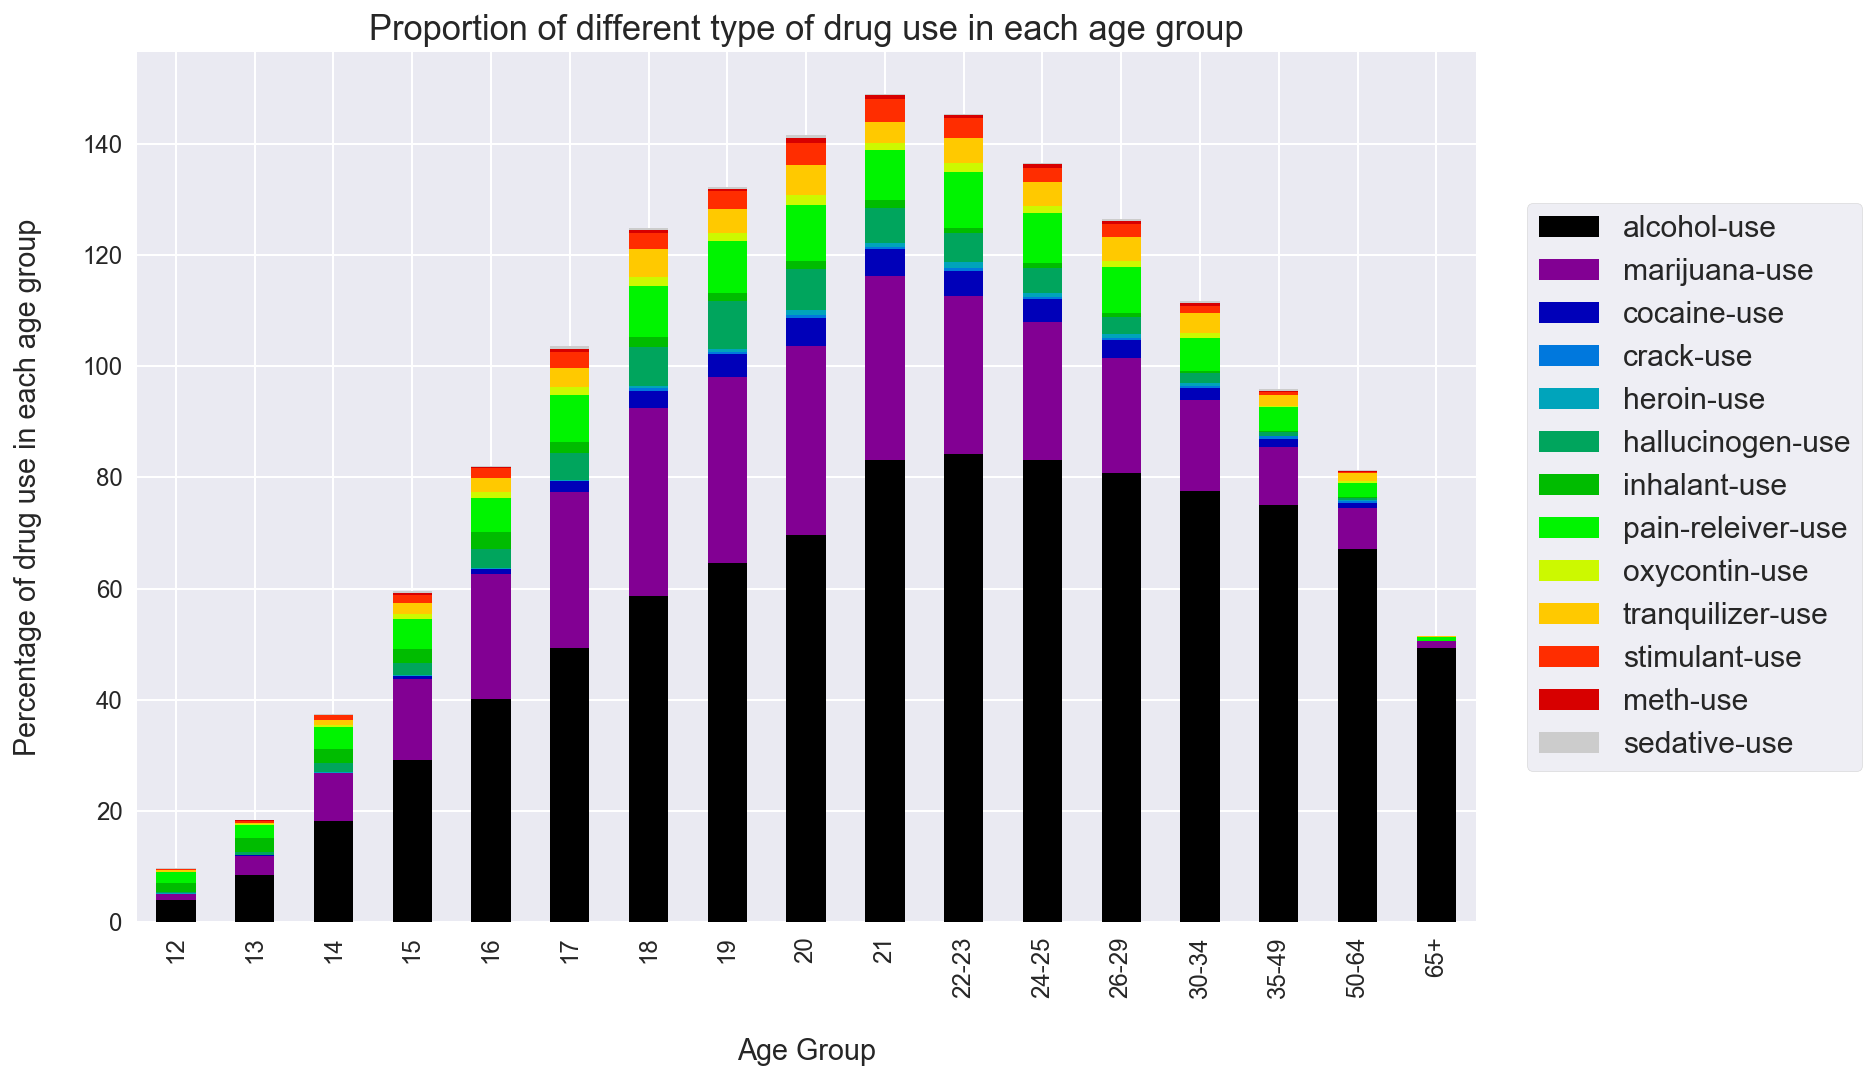

In [29]:
stacked_plot = drug_df.iloc[:,0::2].plot(kind='bar', x='age', stacked=True, colormap='nipy_spectral', fontsize=12.0, figsize=(12,8))

stacked_plot.set_xlabel("Age Group", labelpad=20.0, size = 'large')
stacked_plot.set_ylabel('Percentage of drug use in each age group', labelpad=20.0, size = 'large')
stacked_plot.set_title("Proportion of different type of drug use in each age group", size= 'x-large')
L = stacked_plot.legend(loc="right", bbox_to_anchor=(1.3, 0.5), prop={'size': 15}, frameon=1)

### Observation for drug user percentage in each age group for each drug type.
    1. For each age group, the drug with the largest percentage of user is alcohol.
    2. Age 21 group has the highest overall drug use for most of the drug type.
    3. Age 12 group has the lowest overall drug use for most drug type. (hard to access drugs)
    4. For age 65+ group, the main drug use is alcohol.

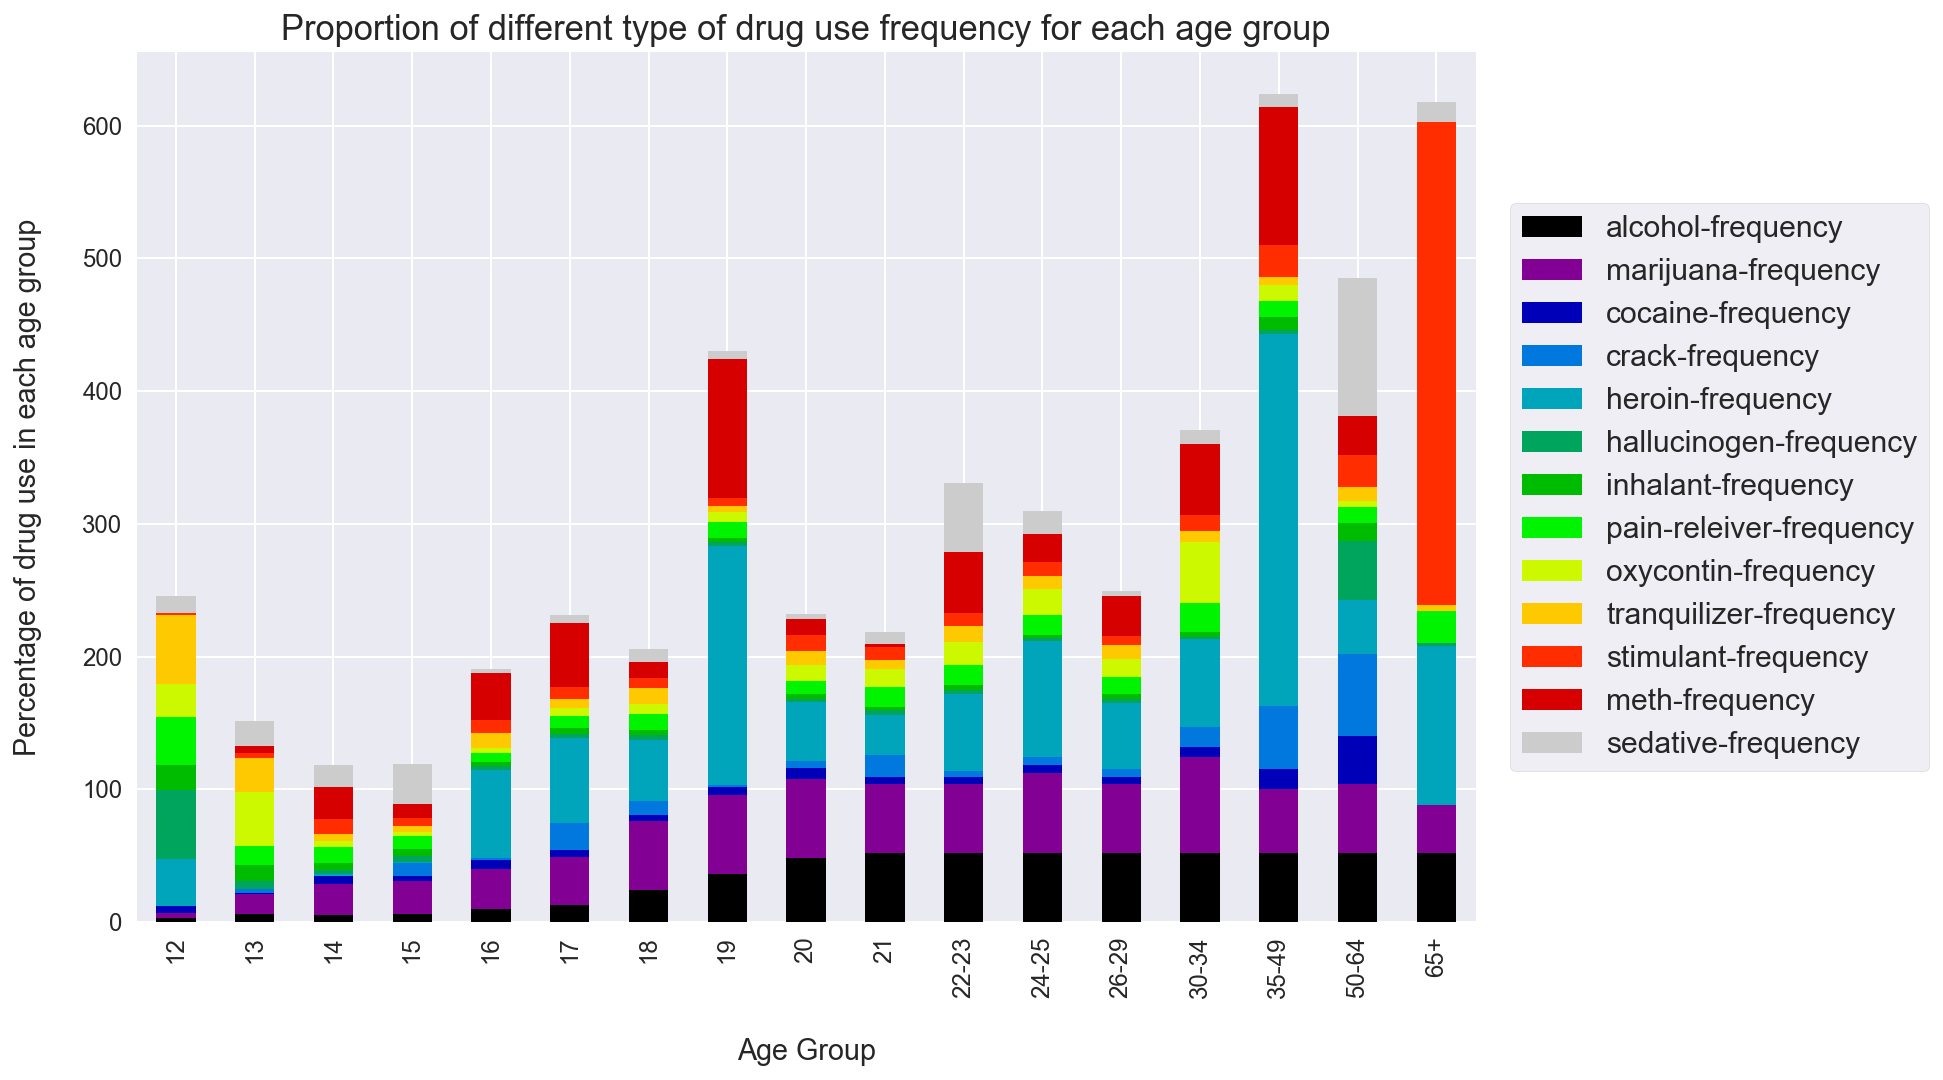

In [30]:
df = drug_df.copy()
df.drop('n', axis=1, inplace=True)

stacked_plot2 = df.iloc[:, 0::2].plot(kind='bar', x='age', stacked=True, colormap = 'nipy_spectral', fontsize=12.0, figsize=(12,8))

stacked_plot2.set_xlabel("Age Group", labelpad=20.0, size = 'large')
stacked_plot2.set_ylabel('Percentage of drug use in each age group', labelpad=20.0, size = 'large')
stacked_plot2.set_title("Proportion of different type of drug use frequency for each age group", size= 'x-large')
L = stacked_plot2.legend(loc="right", bbox_to_anchor=(1.35, 0.5), prop={'size': 15}, frameon=1)

### Observation for drug use frequency in each age group for each drug type.
Different age group has different distribution of drug use frequency.

    1. Highest frequency of heroin drug use comes from age 35-49
    2. Highest frequency of stimulant drug use comes from age 65+
    3. Highest frequency of sedative drug use comes from age 50-64
    4. There is a high meth use for age 19 and age 35-49
    5. Alcohol use frequency raises with age.
    6. For age 12, there is quite a high frequency use of drugs like tranquilizer, hallucinogen and heroin. 
    
Some drugs might be use for medical condition for example like using stimulant drug to treat ADHD and tranquilizer to treatinsomnia.

In [31]:
## stimulant -> make you be more activity
## tranquilizer -> make you sleepy / less active

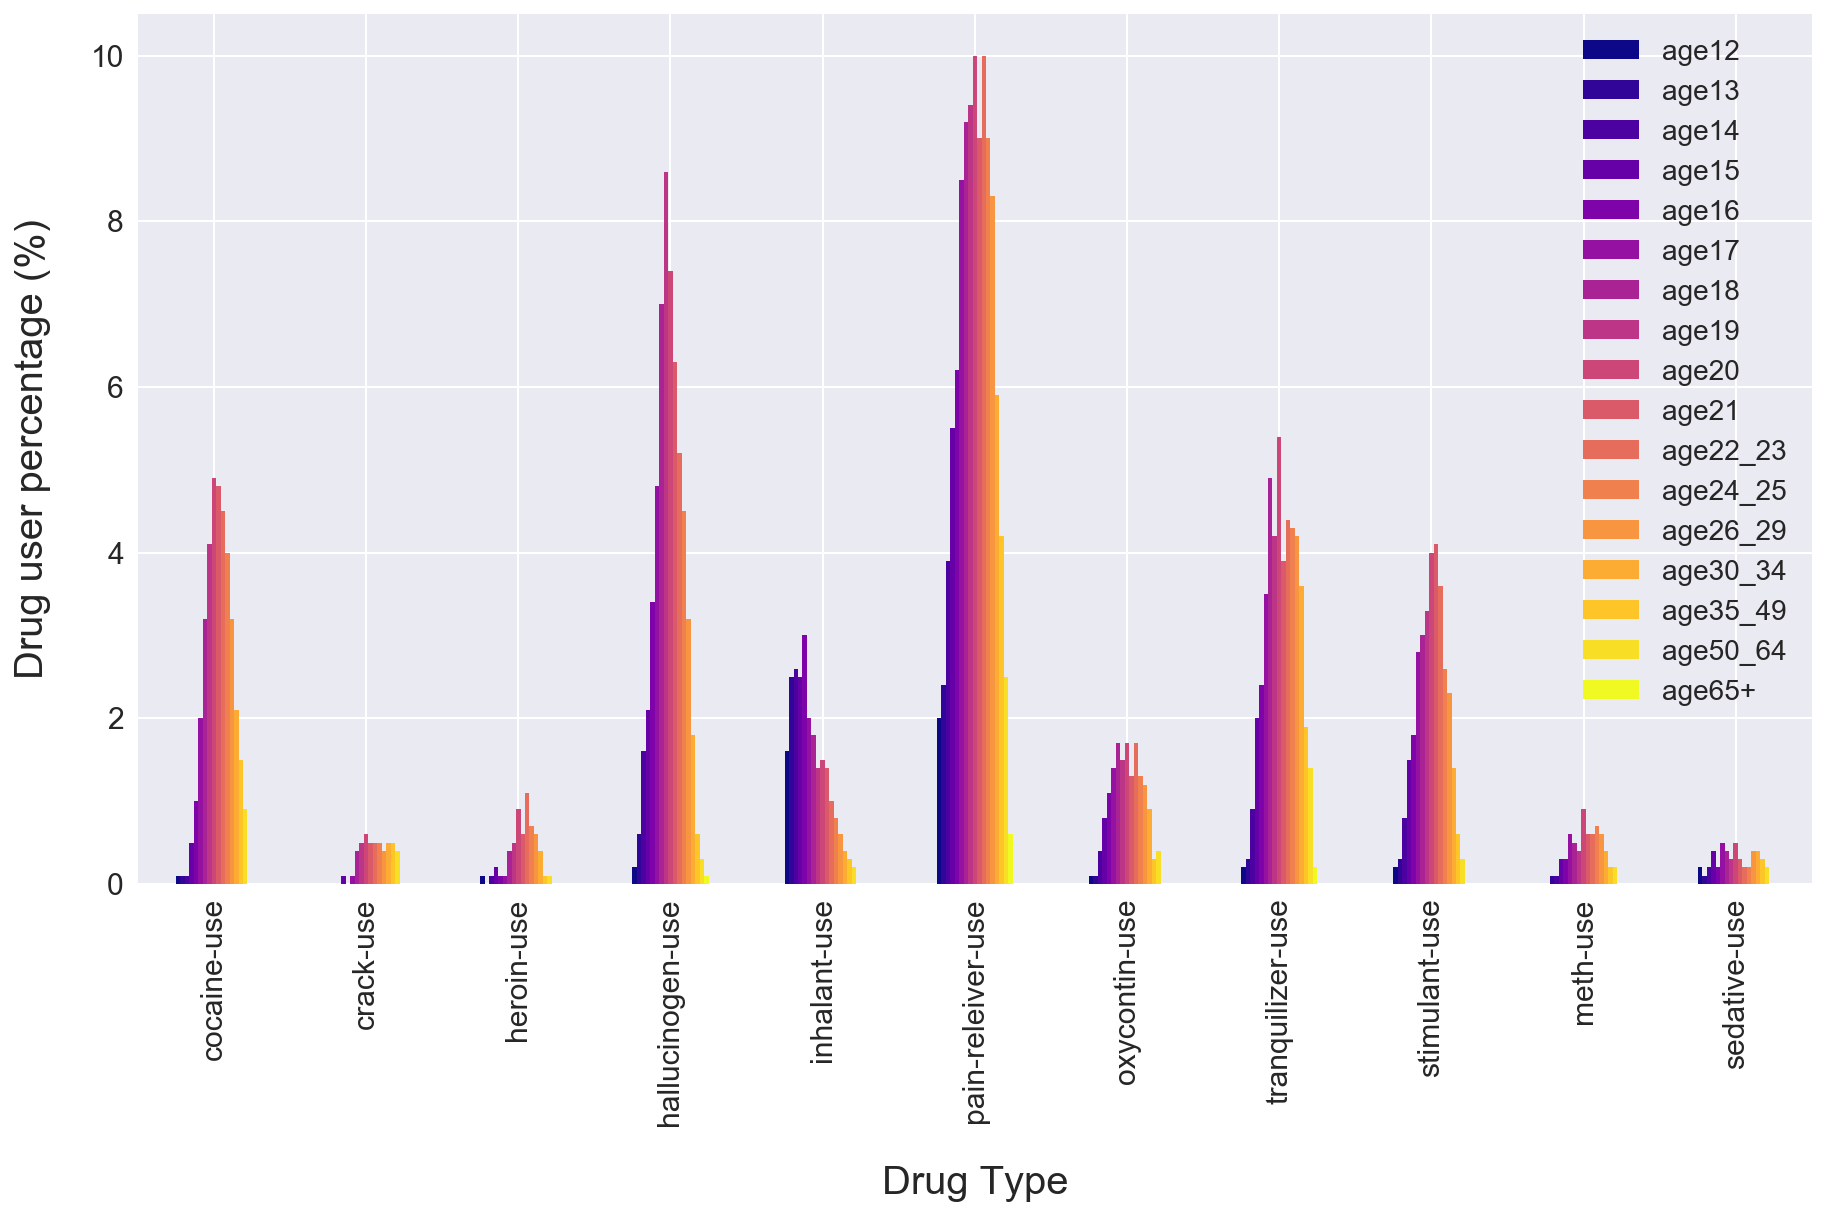

In [32]:
### Look at the distribution of all age group

barplot1 = drug_df.iloc[:,2::2].T
barplot1 = pd.DataFrame(barplot1).reset_index()
barplot1.columns = ['drugs','age12','age13', 'age14', 'age15', 'age16', 'age17', 'age18', 'age19','age20', 'age21',  
                  'age22_23','age24_25', 'age26_29', 'age30_34', 'age35_49', 'age50_64', 'age65+']
#barplot1 = barplot1.sort_values("age12", ascending=False).reset_index(drop=True)

# Other drugs
barplot5 = barplot1.iloc[2:,:]

ax = barplot5.plot(kind='bar', x='drugs', colormap = 'plasma' , fontsize=15.0, figsize=(15,8))
ax.set_xlabel("Drug Type", labelpad=20.0, size = 20)
ax.set_ylabel('Drug user percentage (%)', labelpad=20.0, size = 20)
#ax.set_title("Distribution for each drug type across age group", size= 22 )
ax.legend(loc=1, prop={'size': 14})

Inhalant-use had a skewed distribution towards younger user. (might be due to medical reason or easy accessibility of drugs)

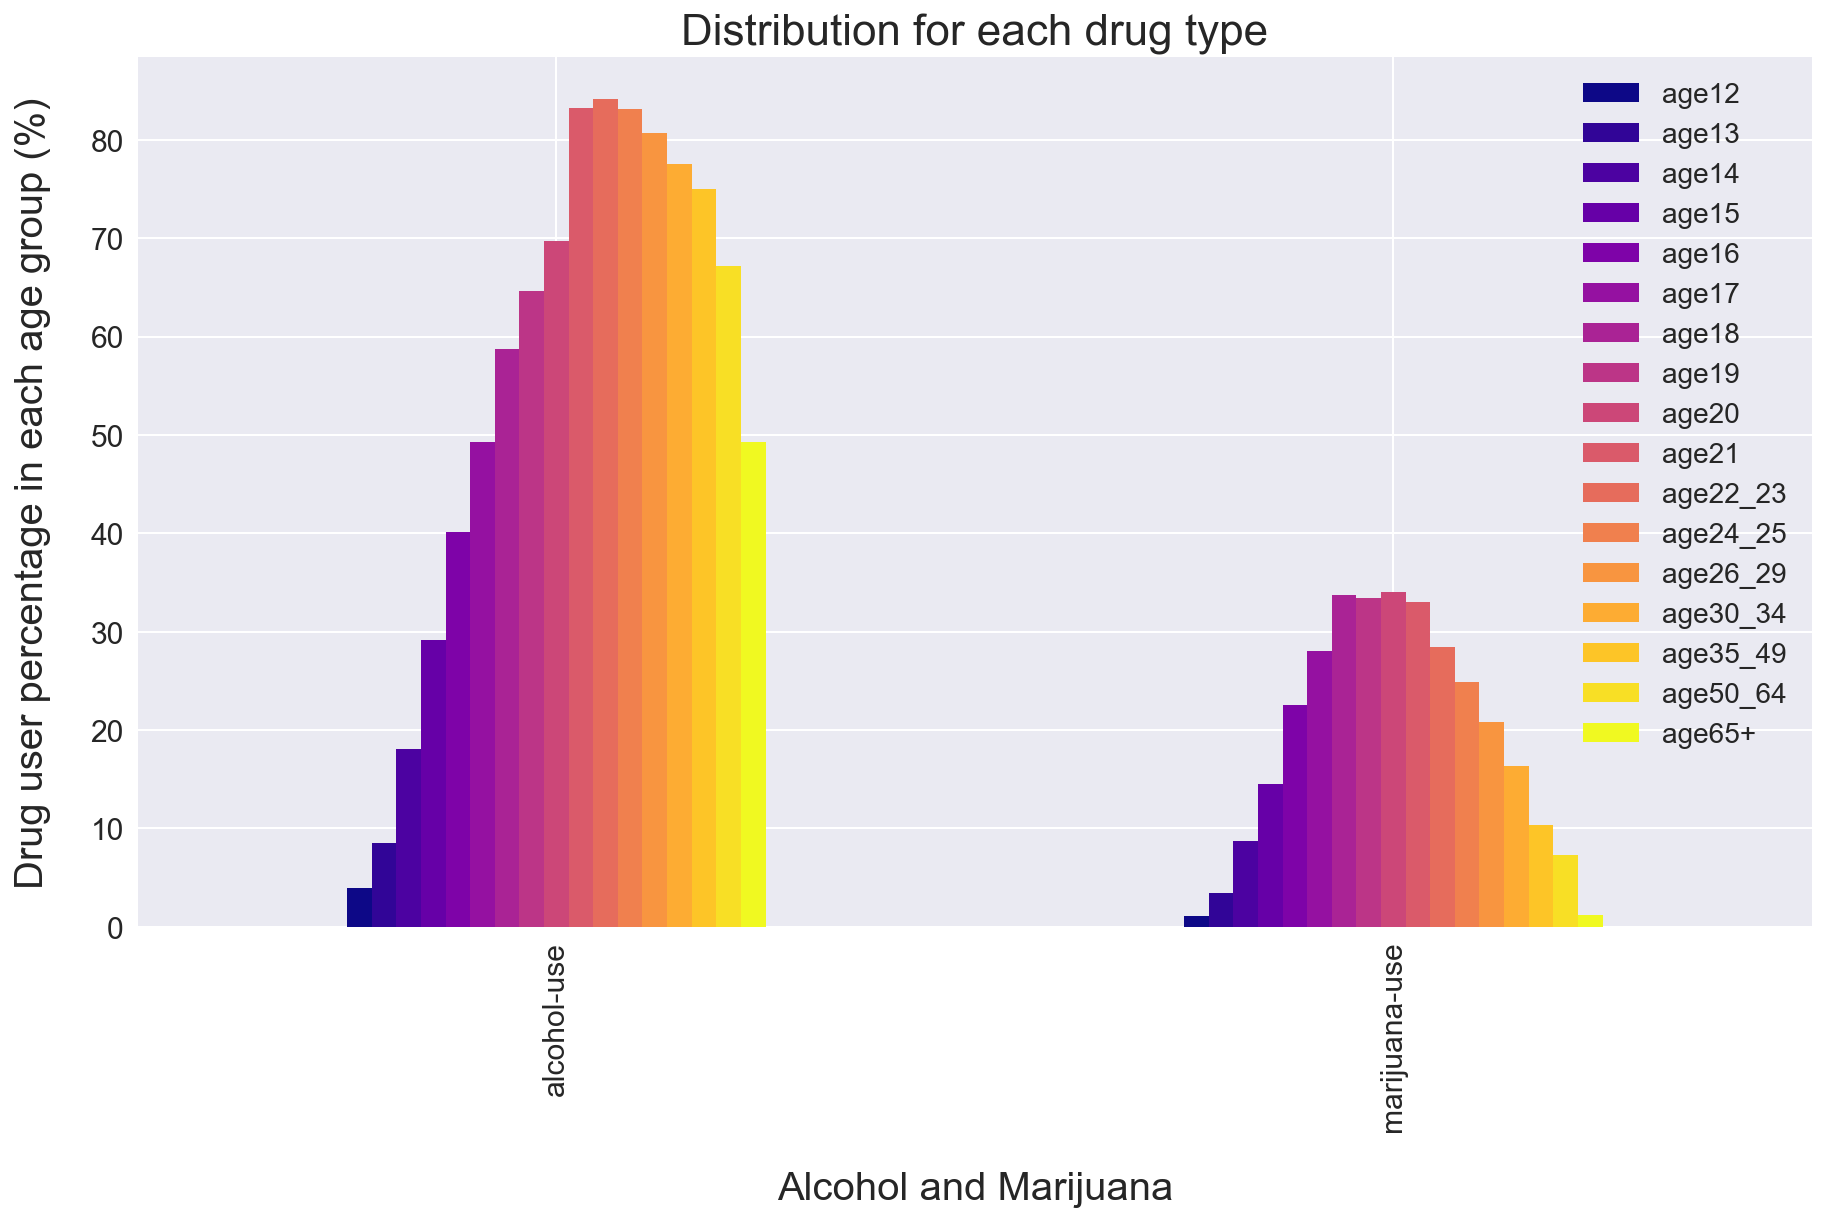

In [33]:

### Pick 2 drugs to compare for 7.3
### use tranquilizer use and stimulant use

### Alcohol and Marijuana

barplot2 = pd.DataFrame(barplot1.iloc[0:2,:])
ax1 = barplot2.plot(kind='bar', x='drugs', colormap = 'plasma' , fontsize=15.0, figsize=(15,8))
ax1.set_xlabel("Alcohol and Marijuana", labelpad=20.0, size = 20)
ax1.set_ylabel('Drug user percentage in each age group (%)', labelpad=20.0, size = 20)
ax1.set_title("Distribution for each drug type", size= 22 )
ax1.legend(loc=1, prop={'size': 14})

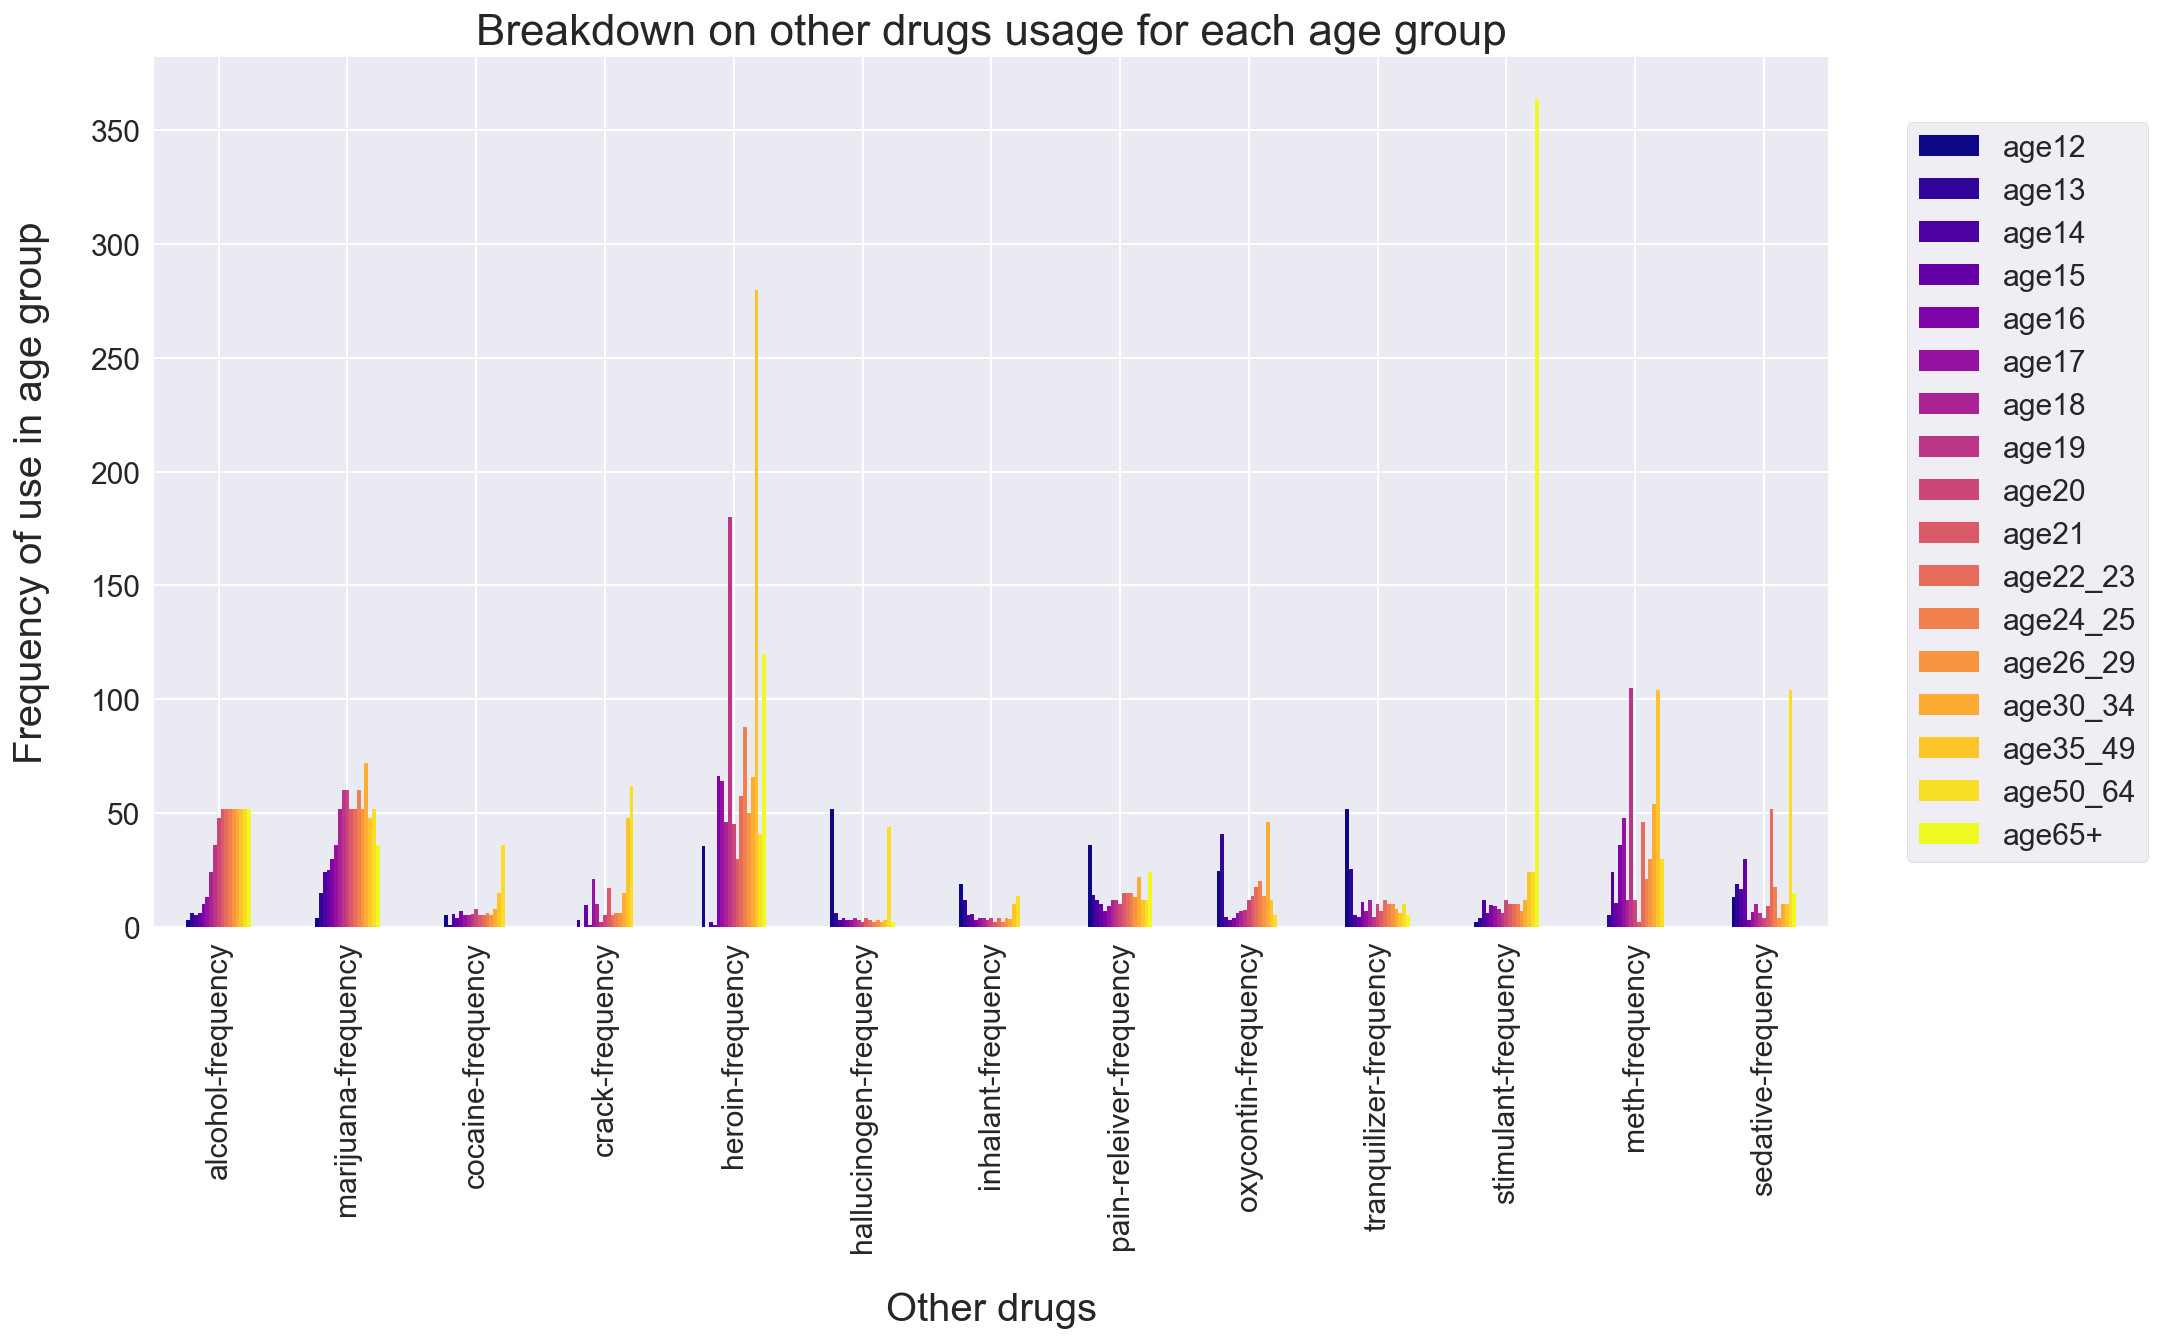

In [64]:
barplot4 = drug_df.copy()
barplot4.drop(['age','n'], axis=1, inplace=True)
barplot4 = barplot4.iloc[:,1::2].T
barplot4 = pd.DataFrame(barplot4).reset_index()
barplot4.columns = ['drugs','age12','age13', 'age14', 'age15', 'age16', 'age17', 'age18', 'age19','age20', 'age21',  
                  'age22_23','age24_25', 'age26_29', 'age30_34', 'age35_49', 'age50_64', 'age65+']


barplot3 = pd.DataFrame(barplot4.iloc[:,:])
ax1 = barplot3.plot(kind='bar', x='drugs',colormap = 'plasma' , fontsize=15.0, figsize=(15,8))
ax1.set_xlabel("Other drugs", labelpad=20.0, size = 20)
ax1.set_ylabel('Frequency of use in age group', labelpad=20.0, size = 20)
ax1.set_title("Breakdown on other drugs usage for each age group", size= 22 )
ax1.legend(loc=1, prop={'size': 14})
L = ax1.legend(loc="right", bbox_to_anchor=(1.2, 0.5), prop={'size': 15}, frameon=1)

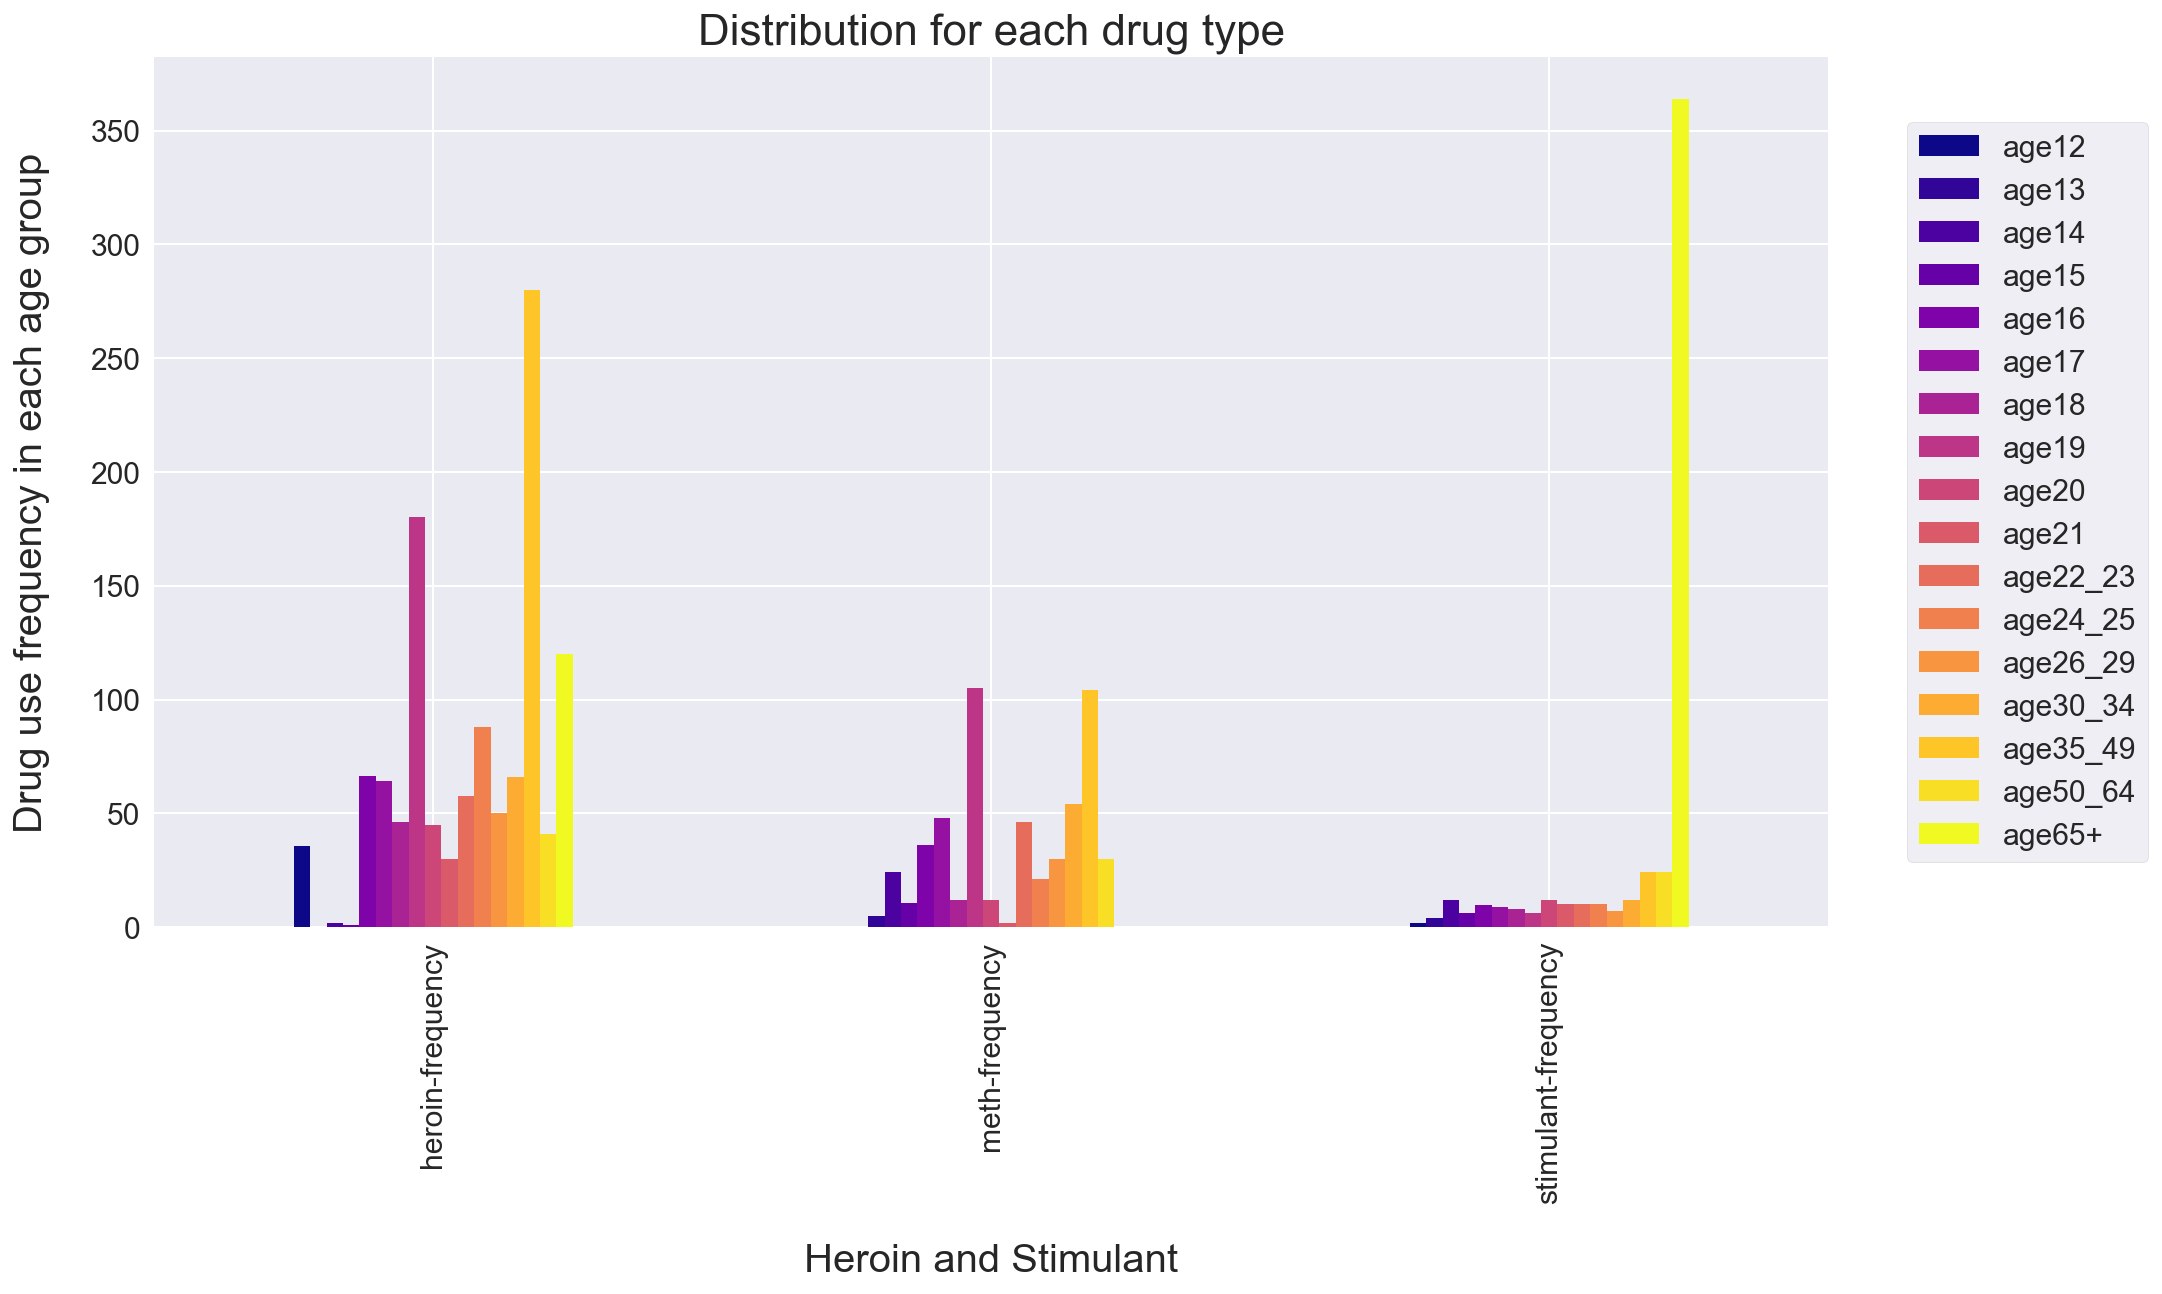

In [35]:
# plot heroin

barplot6 = barplot4.iloc[[4,11,10],:]

ax1 = barplot6.plot(kind='bar', x='drugs', colormap = 'plasma' , fontsize=15.0, figsize=(15,8))
ax1.set_xlabel("Heroin and Stimulant", labelpad=20.0, size = 20)
ax1.set_ylabel('Drug use frequency in each age group', labelpad=20.0, size = 20)
ax1.set_title("Distribution for each drug type", size= 22 )
ax1.legend(loc=1, prop={'size': 14})
L = ax1.legend(loc="right", bbox_to_anchor=(1.2, 0.5), prop={'size': 15}, frameon=1)

Age 19 and Age 35_49 had the highest heroin and meth use frequency. However, a worrying trend is that the percentage of heroin and meth user for these age group are below 1%. This means all the useage frequency is contributed from these 1% user.

Stimulant drug frequency is very high for age 65+ against all other age group.

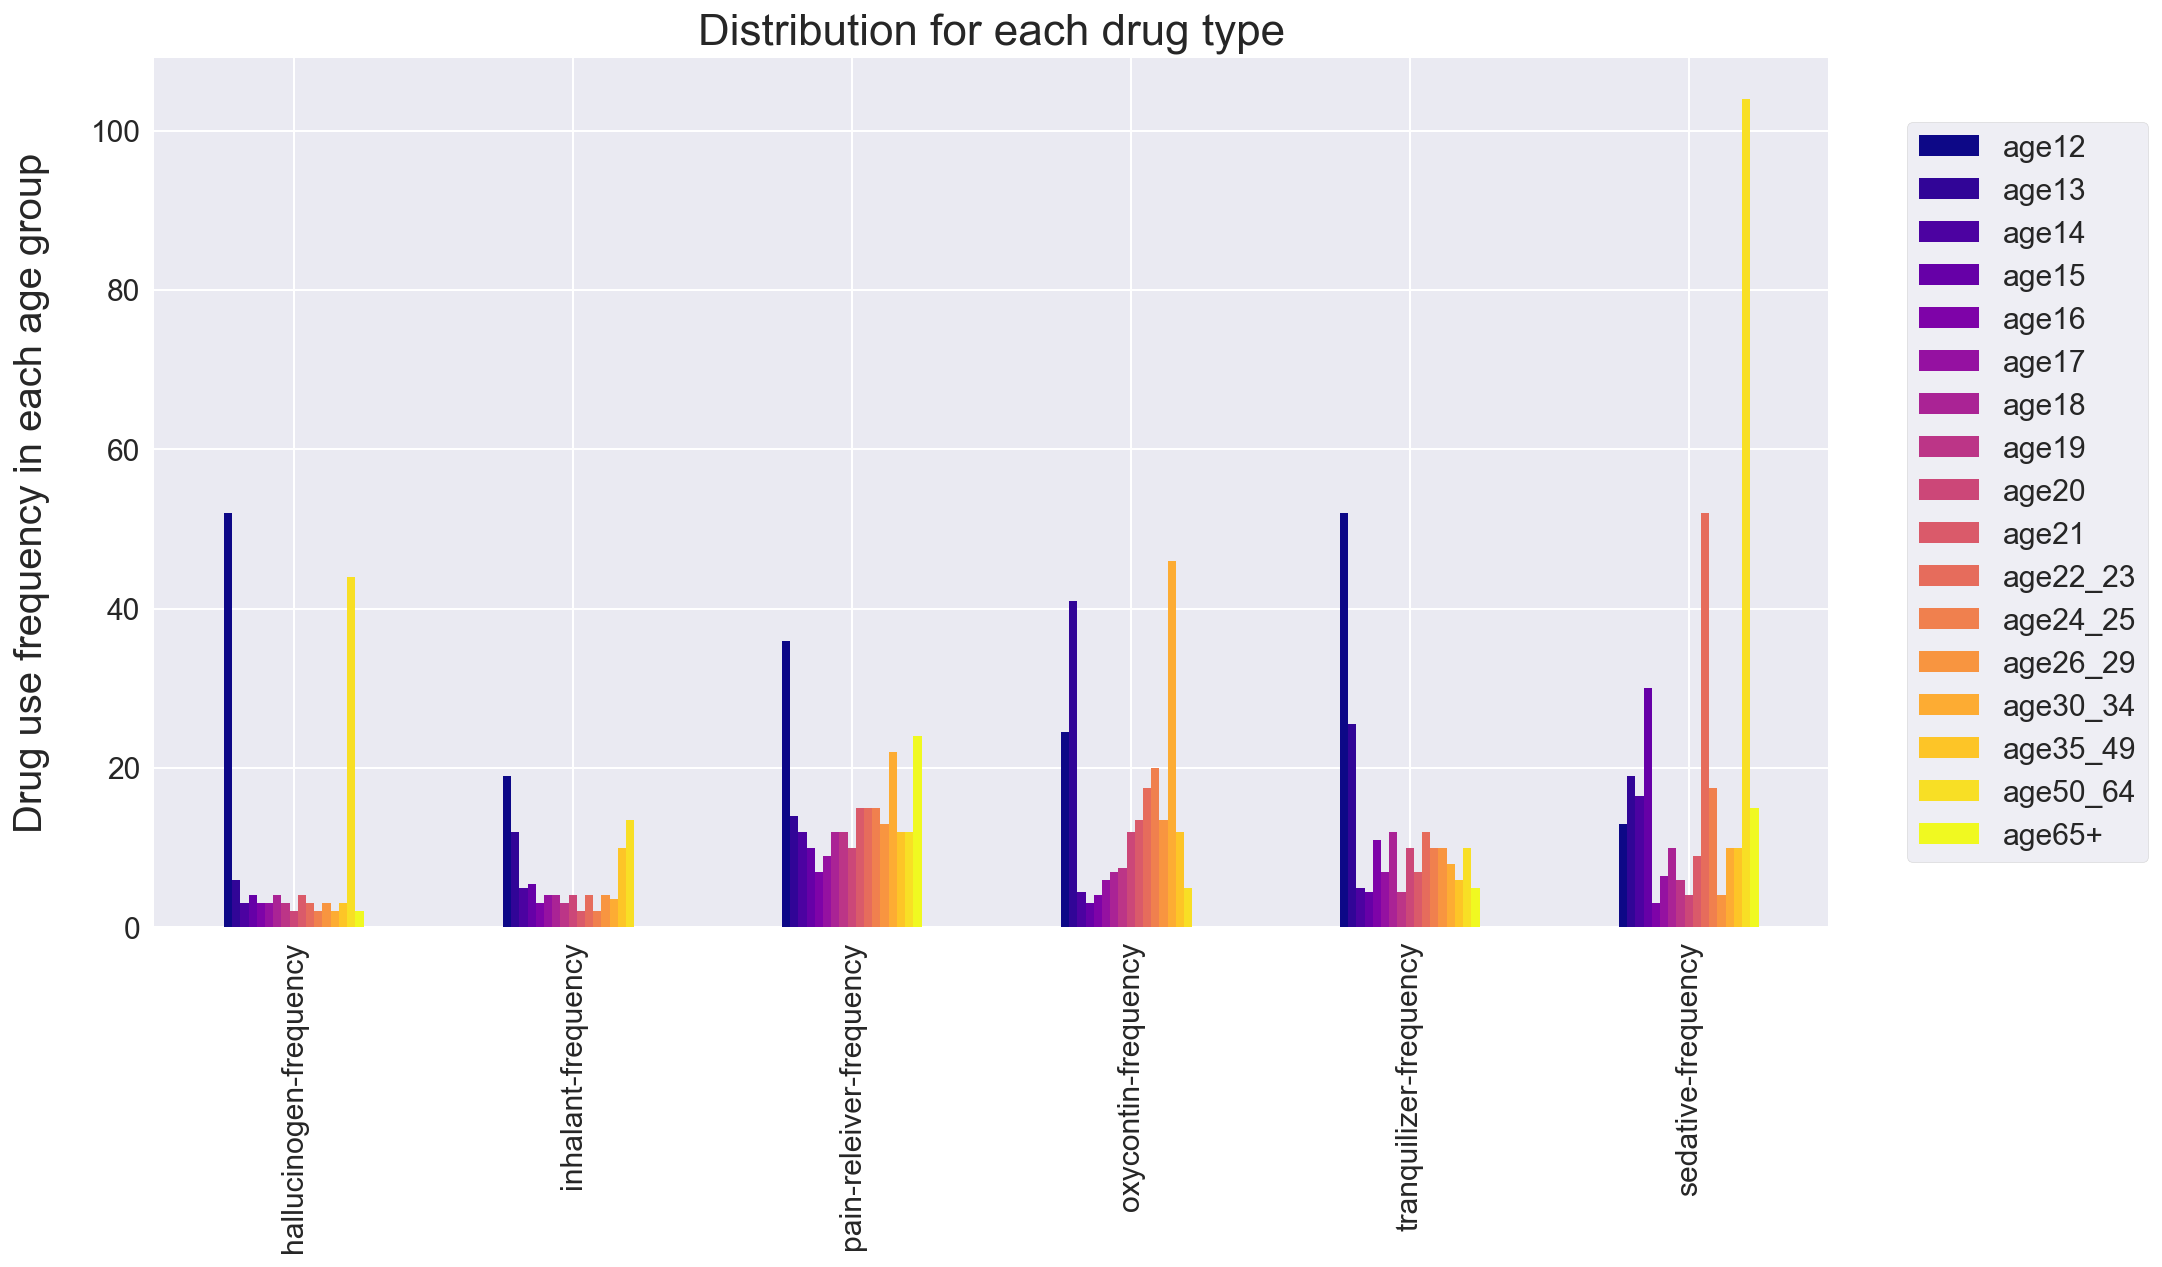

In [36]:
barplot7 = barplot4.iloc[[5,6,7,8,9,12],:]

ax1 = barplot7.plot(kind='bar', x='drugs', colormap = 'plasma' , fontsize=15.0, figsize=(15,8))
ax1.set_xlabel("", labelpad=20.0, size = 20)
ax1.set_ylabel('Drug use frequency in each age group', labelpad=20.0, size = 20)
ax1.set_title("Distribution for each drug type", size= 22 )
ax1.legend(loc=1, prop={'size': 14})
L = ax1.legend(loc="right", bbox_to_anchor=(1.2, 0.5), prop={'size': 15}, frameon=1)

For age below 15, the most frequency drug use are hallucinogen, inhalant, pain releiver, oxycontin, tranquilizer and sedative.

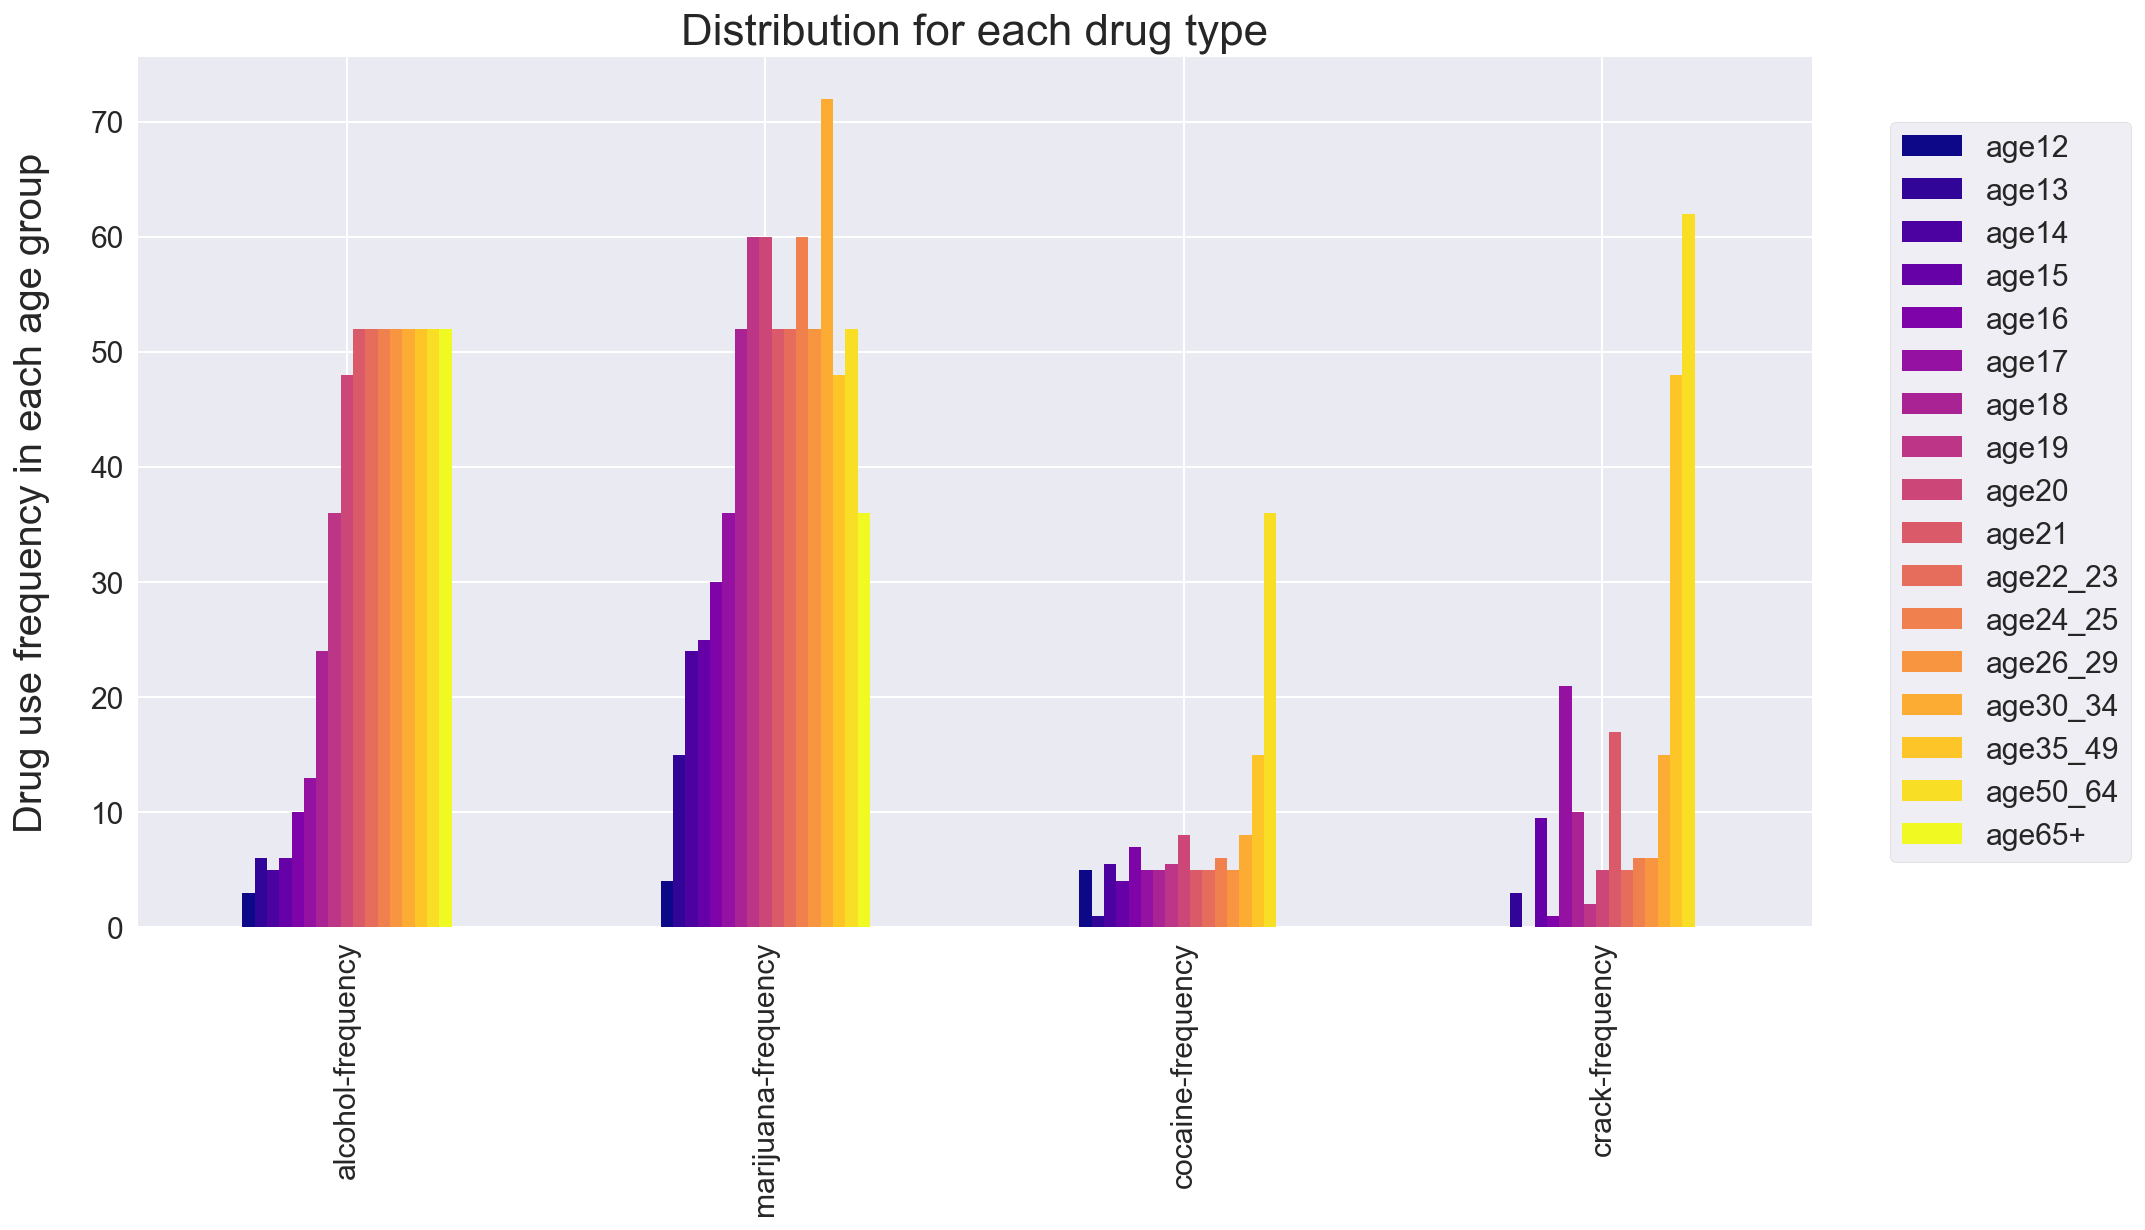

In [37]:
barplot8 = barplot4.iloc[[0,1,2,3],:]

ax1 = barplot8.plot(kind='bar', x='drugs', colormap = 'plasma' , fontsize=15.0, figsize=(15,8))
ax1.set_xlabel("", labelpad=20.0, size = 20)
ax1.set_ylabel('Drug use frequency in each age group', labelpad=20.0, size = 20)
ax1.set_title("Distribution for each drug type", size= 22 )
ax1.legend(loc=1, prop={'size': 14})
L = ax1.legend(loc="right", bbox_to_anchor=(1.2, 0.5), prop={'size': 15}, frameon=1)

Cocaine and crack drug use frequency is highest for age 50-64.

Alcohol use frequency increases with age. (those data after age 21 seems be to interploted or copied)

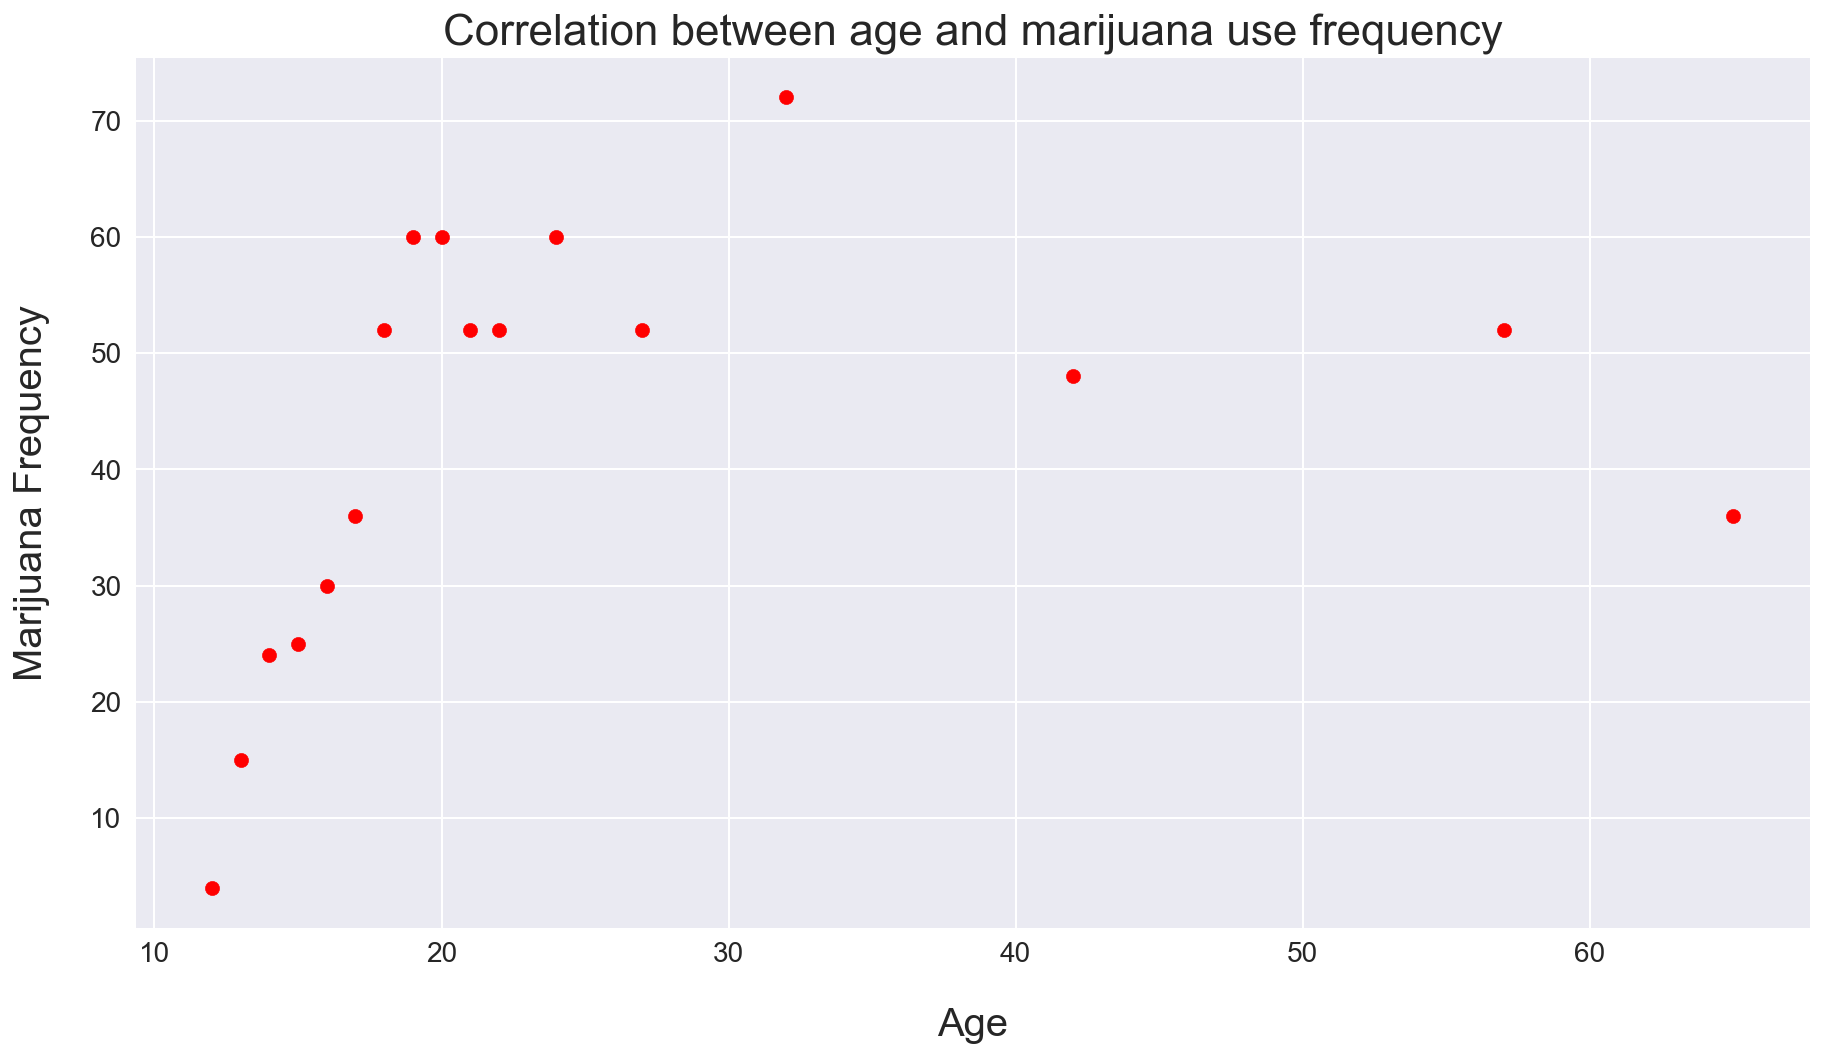

In [38]:
# Check correlation for age of marijuana user and marijuana frequency

scatter = drug_df.drop('n',axis=1)
scatter = scatter.iloc[:,0::2]
scatter.age = scatter.age.str.replace('+','')
scatter.age = scatter.age.str.replace('-','')
scatter.age = scatter.age.astype(float)

# get the average of the range for age.

scatter.iloc[10,0] = (22+23)/2
scatter.iloc[11,0] = (24+25)/2
scatter.iloc[12,0] = (26+29)/2
scatter.iloc[13,0] = (30+34)/2
scatter.iloc[14,0] = (35+49)/2
scatter.iloc[15,0] = (50+64)/2


#ax1 = scatter.plot(kind='scatter', x ='age', y='alcohol-frequency', figsize=(15,8), fontsize=14, s=50, color='r')
#ax2 = scatter.plot(kind='scatter', x='age', y='marijuana-frequency', figsize=(15,8), fontsize=14, s=50, color='r', ax=ax1)    
#ax3 = scatter.plot(kind='scatter', x='age', y='cocaine-frequency', figsize=(15,8), fontsize=14, s=50, color='r', ax=ax1)      
#ax4 = scatter.plot(kind='scatter', x='age', y='crack-frequency', figsize=(15,8), fontsize=14, s=50, color='r', ax=ax1) 
#ax5 = scatter.plot(kind='scatter', x='age', y='heroin-frequency', figsize=(15,8), fontsize=14, s=50, color='r', ax=ax1)
#ax6 = scatter.plot(kind='scatter', x='age', y='hallucinogen-frequency', figsize=(15,8), fontsize=14, s=50, color='r', ax=ax1)
#ax7 = scatter.plot(kind='scatter', x='age', y='inhalant-frequency', figsize=(15,8), fontsize=14, s=50, color='r', ax=ax1)
#ax8 = scatter.plot(kind='scatter', x='age', y='pain-releiver-frequency', figsize=(15,8), fontsize=14, s=50, color='r', ax=ax1)
#ax9 = scatter.plot(kind='scatter', x='age', y='oxycontin-frequency', figsize=(15,8), fontsize=14, s=50, color='r', ax=ax1)
#ax10 = scatter.plot(kind='scatter', x='age', y='tranquilizer-frequency', figsize=(15,8), fontsize=14, s=50, color='r', ax=ax1)
#ax11 = scatter.plot(kind='scatter', x='age', y='stimulant-frequency', figsize=(15,8), fontsize=14, s=50, color='r', ax=ax1)
#ax12 = scatter.plot(kind='scatter', x='age', y='meth-frequency', figsize=(15,8), fontsize=14, s=50, color='r', ax=ax1)
#ax13 = scatter.plot(kind='scatter', x='age', y='sedative-frequency', figsize=(15,8), fontsize=14, s=50, color='r', ax=ax1)


ax1 = scatter.plot(kind='scatter', x ='age', y='marijuana-frequency', figsize=(15,8), fontsize=14, s=50, color='r')
ax1.set_xlabel("Age", labelpad=20.0, size = 20)
ax1.set_ylabel('Marijuana Frequency', labelpad=20.0, size = 20)
ax1.set_title("Correlation between age and marijuana use frequency", size= 22)



### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


Question: Is marijuana use frequency correlated with age of user?


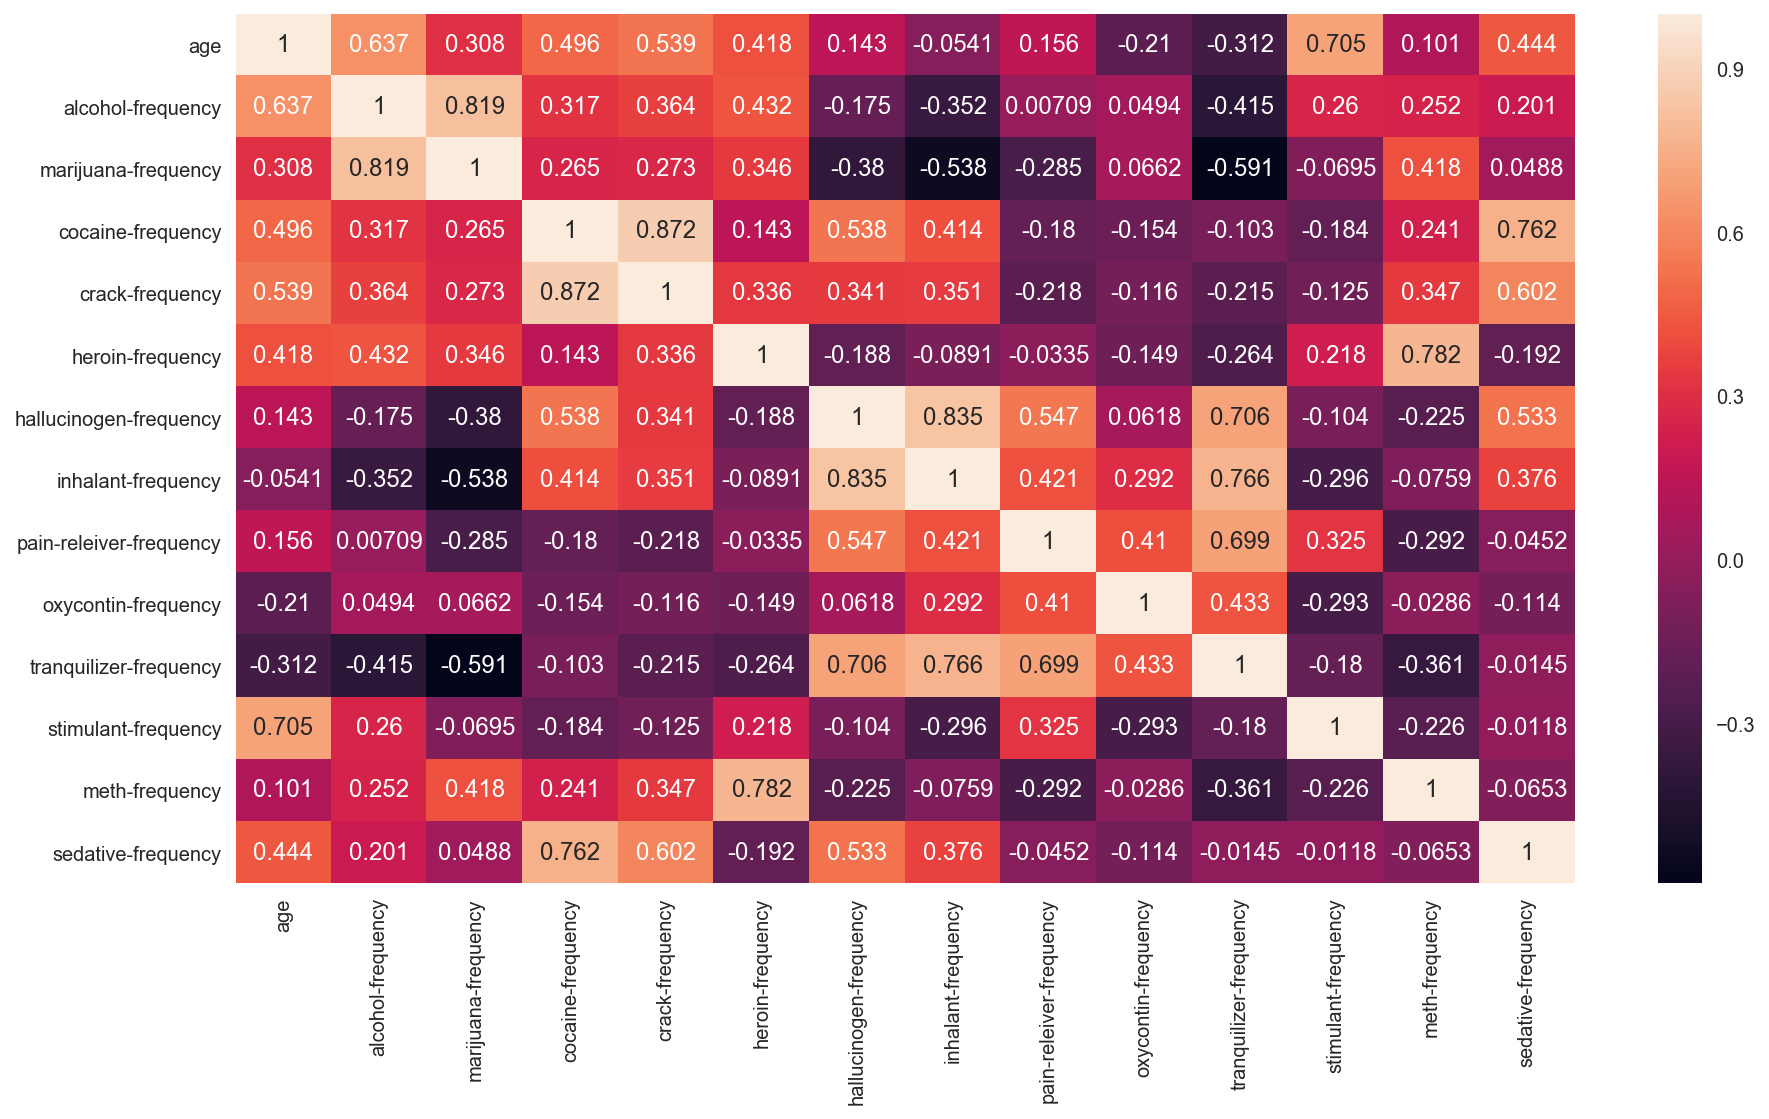

In [76]:
sns.heatmap(scatter.corr(), annot=True, fmt= '.3g')

Seem that the correlation between marijuana use frequency and age are not very well correlated.
Deliverables: we either reject or do not reject that the pearson correlation coefficient for marijuana use frequency and age is not significant

    1) Null hypothesis: This pearson correlation coefficient is not significant
        H0: population correlation = 0
        
    2) Alternative hypothesis: pearson correlation coefficient is significant
        HA: population correlation != 0

In [79]:
sample_size = scatter.age.count()

t_value=(0.307854*np.sqrt(sample_size-2)) / np.sqrt(1-0.307854**2)
print ('the t value is %.9g' % t_value)



the t value is 1.25317563


In [41]:
# we are doing a two tailed test
# look up t-distribution, assume significant level of 0.05

Critical_tvalue = 2.131

**Report**
We are testing the significant of the correlation between the age number and marijuana use frequency.
Our calculate t_value is given by $$ t_{value} = \frac{r*\sqrt(n-2)}{\sqrt{1-r^2}} $$

where $r$ is the pearson correlation coefficient and $n$ is the sample size. The calculated $t_{value}$ is 1.253 for a sample size n = 17. Assuming an $\alpha$ value of 0.05 or an significant level of 0.05, the t critical value from the student's t distribution is 2.131. Since our $t_{value}$ is less then the t critical value, we can conclude that the p-value is less than 0.05. This means that we reject the null hypothesis that the pearson correlation coefficient is not significant.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

### Quick Look at rate variable with `hist()` and `boxplot`

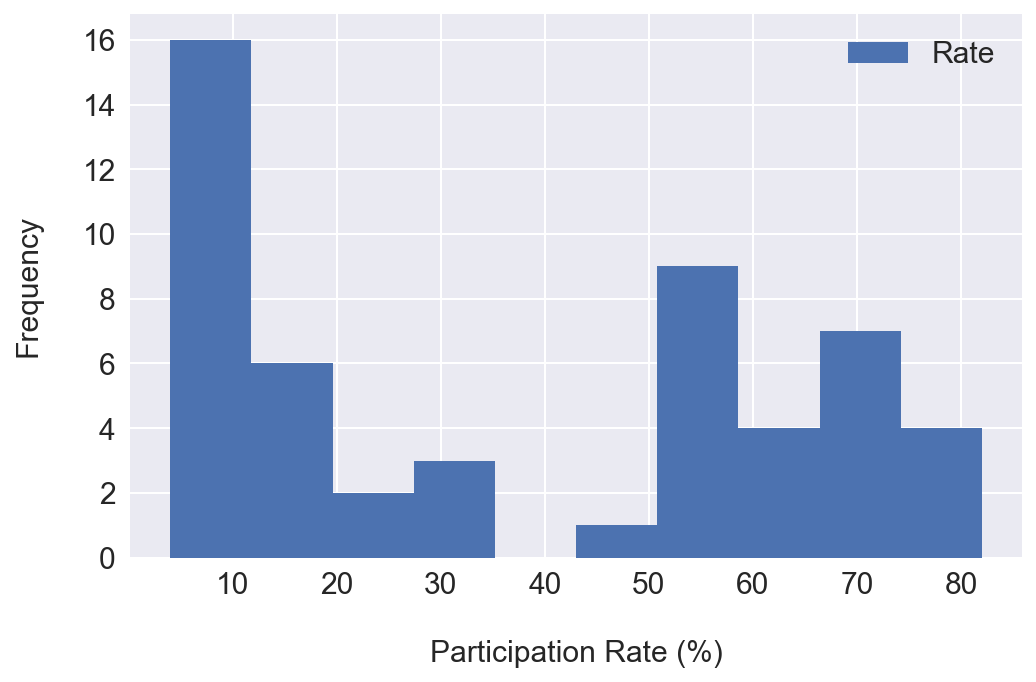

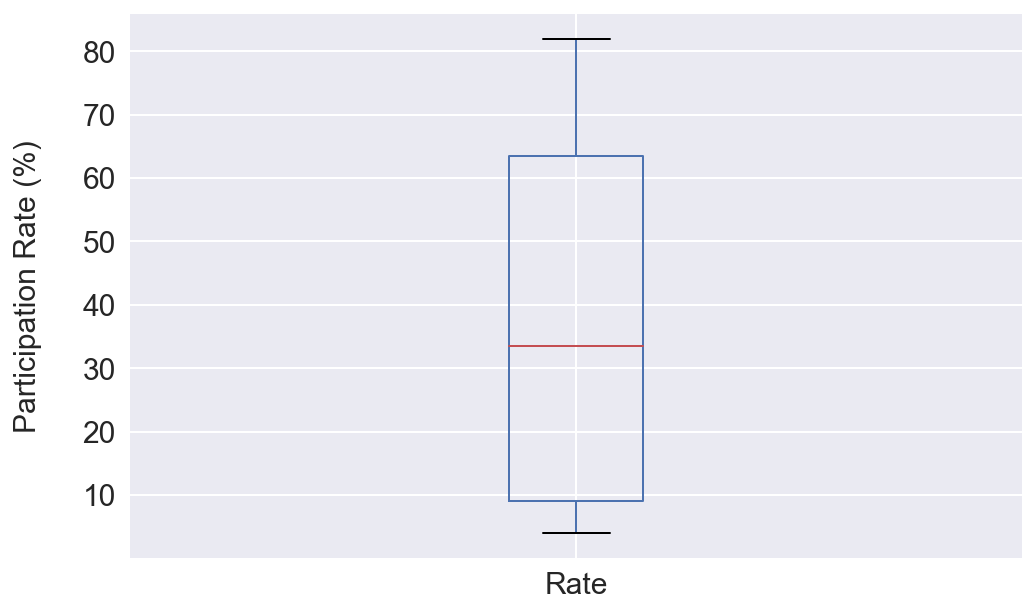

In [42]:
rate = sat_df.loc[:,['Rate']]
math = sat_df.loc[:,['Math']]
verbal = sat_df.loc[:,['Verbal']]

ax1 = rate.plot.hist(bins=10, figsize=(8,5))
ax1.set_xlabel("Participation Rate (%)", labelpad = 20, size=15)
ax1.set_ylabel("Frequency",labelpad = 20, size=15)
ax1.legend(prop={'size': 15})
ax1.tick_params(axis='both', which='major', labelsize=15)

ax2 = rate.plot.box(figsize=(8,5))
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.set_ylabel("Participation Rate (%)", labelpad = 20, size=15)


From these 2 plots, it can be shown that there are no outliers in the "Rate" columns. <br>
Looking at the other 2 data columns in sat dataset. <br>

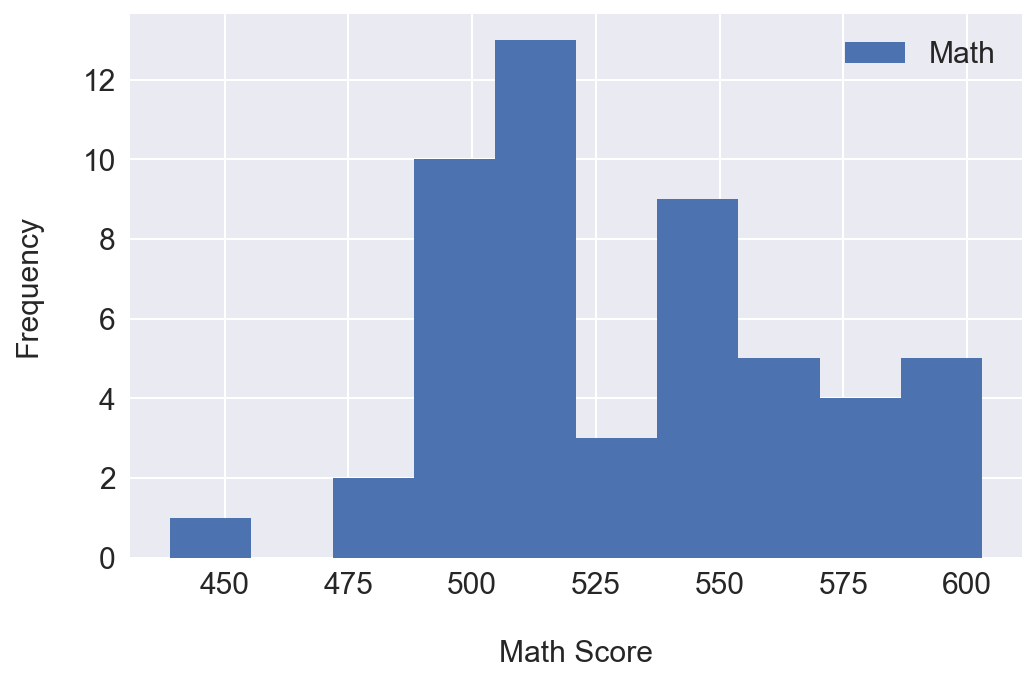

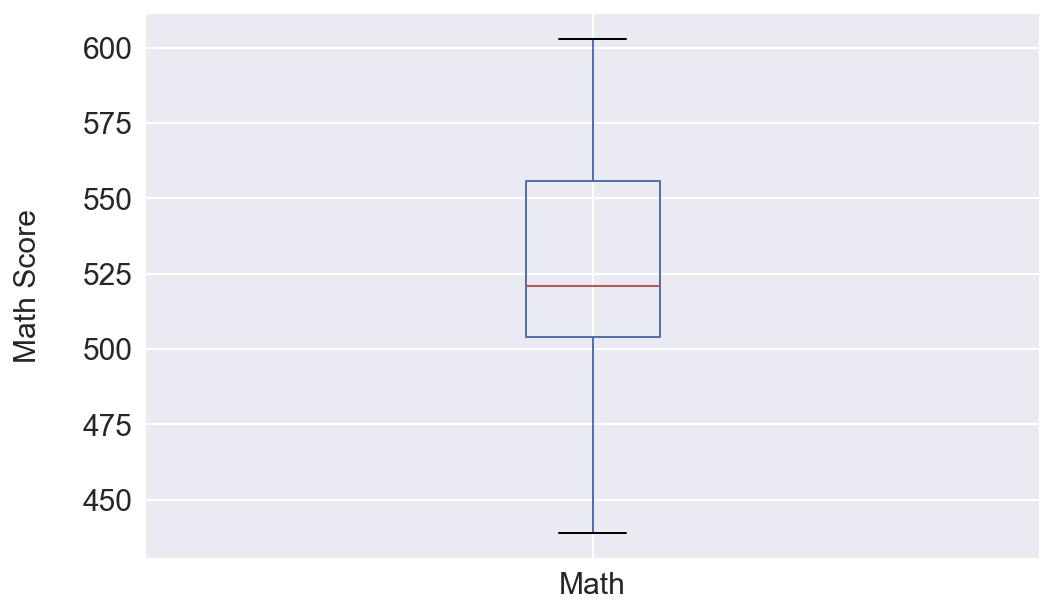

In [43]:
ax1 = math.plot.hist(bins=10, figsize=(8,5))
ax1.set_xlabel("Math Score", labelpad = 20, size=15)
ax1.set_ylabel("Frequency",labelpad = 20, size=15)
ax1.legend(prop={'size': 15})
ax1.tick_params(axis='both', which='major', labelsize=15)

ax2 = math.plot.box(figsize=(8,5))
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.set_ylabel("Math Score", labelpad = 20, size=15)

Math column seems to have one outlier location at the left side of the histogram. However with the box plot, it does not show any outliers. 

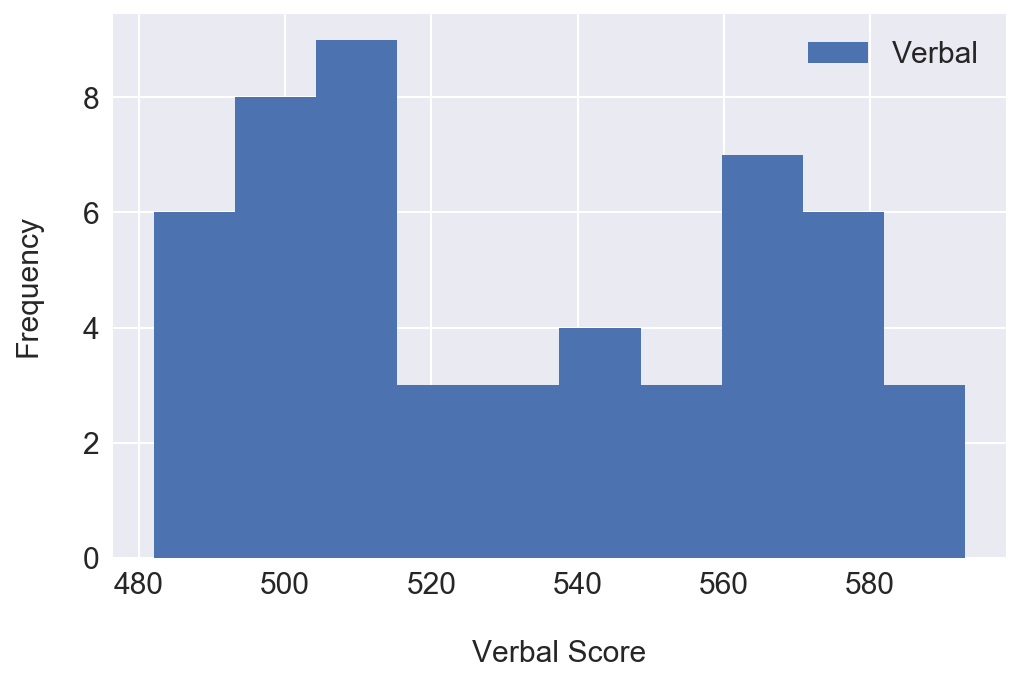

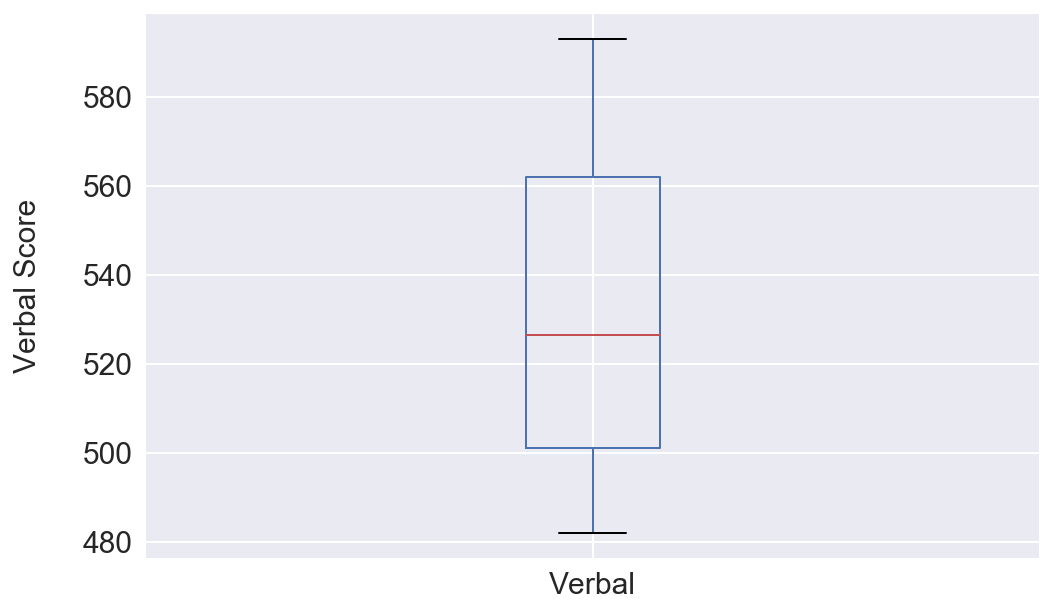

In [44]:
ax1 = verbal.plot.hist(bins=10, figsize=(8,5))
ax1.set_xlabel("Verbal Score", labelpad = 20, size=15)
ax1.set_ylabel("Frequency",labelpad = 20, size=15)
ax1.legend(prop={'size': 15})
ax1.tick_params(axis='both', which='major', labelsize=15)

ax2 = verbal.plot.box(figsize=(8,5))
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.set_ylabel("Verbal Score", labelpad = 20, size=15)

Verbal column does not have any outliers as show with the histogram and boxplot.

## Use three method to calculate the criteria for outliers
Method 1: Z score method <br>
Method 2: Modified Z score method <br>
Method 3: IQR method <br>

---
### Method 1: Z score method
Work well with normally distributed samples. Not robust against skewed distribution and small sample size

In [45]:
def z_score(data, no_of_std):
    """ recommended no_of_std is 3 std dev"""
    data = list(data.iloc[:,0])
    no_std = no_of_std
    mean = np.mean(data)
    std = np.std(data)
    z_s = [(d-mean)/std for d in data]
    return [data[i] for i,v in enumerate(z_s) if abs(v) > no_std]

### Method 2: Modified Z score method
less affect by outliers and non-normal data

In [46]:
# Modified Z score method uses median and median absolute deviation for the calculation  of z score

def mod_z_score(data, threshold):
    """ recommended threshold value = 3.5 """
    data = list(data.iloc[:,0])
    median = np.median(data)
    MAD = np.median([abs(d-median) for d in data])
    m_z_scores = [ 0.6745*(d-median)/MAD for d in data ]
    return [data[i] for i,v in enumerate(m_z_scores) if abs(v) > threshold]

### Method 3: IQR method
robust against outliers and skewness

In [47]:
def iqr(data, v):
    """ recommended v value is 1.5 for mild outlier and 3 for extreme outlier """
    data = list(data.iloc[:,0])
    q1,q3 = np.percentile(data,[25,75])
    iqr = q3 - q1
    lower_fence = q1 - (v*iqr)
    upper_fence = q3 + (v*iqr)
    return [data[i] for i,v in enumerate(data) if v > upper_fence or v < lower_fence]

In [48]:
# Test on rate column
print z_score(rate, 2)
print mod_z_score(rate, 3.5)
print iqr(rate,1.5)

[]
[]
[]


In [49]:
# Test on math column
print z_score(math, 3)
print mod_z_score(math, 3.5)
print iqr(math,1.5)

[]
[]
[]


In [50]:
# Test on verbal column
print z_score(verbal, 3)
print mod_z_score(verbal, 3.5)
print iqr(verbal,1.5)

[]
[]
[]


In [51]:
#scatter plot of math and verbal review an outlier in the 2D sense

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [52]:
math_verbal = sat_df.iloc[:,2:4]
# pearson correlation matrix
print "Pearson"
print math_verbal.corr(method='pearson')
# spearman rank correaltion matrix
print ""
print "Spearman"
print math_verbal.corr(method='spearman')

Pearson
          Verbal      Math
Verbal  1.000000  0.899871
Math    0.899871  1.000000

Spearman
          Verbal      Math
Verbal  1.000000  0.905205
Math    0.905205  1.000000


From the matrix calculated, spearman correlation is slightly higher then pearson correlation
The spearman rank correlation is calculated by assigning a rank number to the distribution of Verbal and Math. The highest rank (1) is assigned to the max score in Verbal and Math and lowest rank is assigned to the min score. The spearman correlation is calculated by dividing covariance of the rank variables of Verbal and Math and divided by standard deviation of rank variables.

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [62]:
sat_df['Rate_Pct'] = sat_df['Rate'].rank(pct=True)*100
print sat_df[sat_df['State'] == 'CA']

## the percentile is used to calculated the spearman rank correlation by 
## finding the difference in the rank percentile value between 2 column 

   State  Rate  Verbal  Math   Rate_Pct
23    CA    51     498   517  56.730769


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

In [54]:
# Percentile are robust against skewness due to outliers.
